In [445]:
import os
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

import fanalysis
from fanalysis.ca import CA

In [328]:
csv_file_path = "student/student-mat.csv"
# data = pd.read_csv(csv_file_path, sep='\s+', skipinitialspace=True)
# data = pd.read_table(csv_file_path, header=0, index_col=0, sep='\s+', encoding="utf-8")
data = pd.read_csv(csv_file_path, sep=';', skipinitialspace=True)

In [329]:
data

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[395 rows x 33 columns]

In [330]:
data.shape

(395, 33)

age


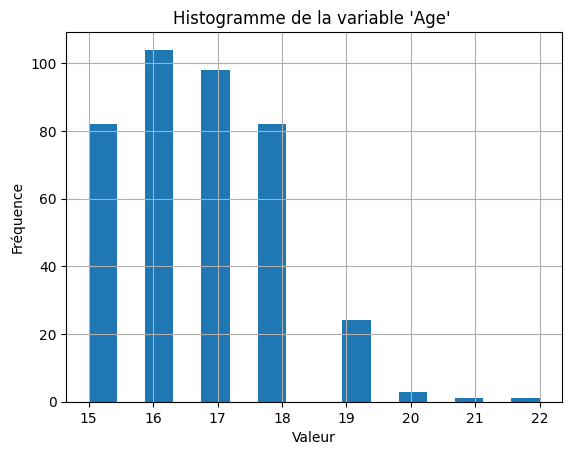

In [331]:
var_quanti = ['age']
for col in var_quanti:
  print(col)
  hist = data[col].hist(bins=16)
  plt.title("Histogramme de la variable 'Age' ")
  plt.xlabel("Valeur")
  plt.ylabel("Fréquence")
  plt.show()

In [332]:
data_new=data.copy()

In [333]:
data_new["age"].value_counts()

age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64

In [334]:
import pandas as pd

# Assuming you have your dataset loaded into a DataFrame called 'data'
# Example: data = pd.read_csv('your_dataset.csv')

bins = [15, 16, 17, 18, 22]  
labels = ['15', '16', '17', '18-22']

# Apply the pd.cut function to categorize the age
data_new['age'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Check the updated data
# print(data[['age', 'age_group']])

data_new["age"].value_counts()

age
18-22    110
16       104
17        98
15        82
Name: count, dtype: int64

In [324]:
import pandas as pd

# Assuming you have your dataset loaded into a DataFrame called 'data'
# Example: data = pd.read_csv('your_dataset.csv')

# For the 'G3' (grades of maths) variable
# bins_G3 = [0, 4, 9, 13, 20]  
# labels_G3 = ['0 to 0', '4 to 9', '10 to 13', '14 to 20']

# Apply the pd.cut function to categorize the G3 variable
# data_new['G3'] = pd.cut(data['G3'], bins=bins_G3, labels=labels_G3, right=False)


# data_new["G3"].value_counts()

In [335]:
import pandas as pd

# Assuming you have your dataset loaded into a DataFrame called 'data'
# Example: data = pd.read_csv('your_dataset.csv')

# For the 'G3' (grades of maths) variable
bins_G3 = [0, 10, 20]  # Bins for <10 and >=10
labels_G3 = ['<10', '>=10']  # Labels for the two classes

# Apply the pd.cut function to categorize the G3 variable into two classes
data_new['G3'] = pd.cut(data['G3'], bins=bins_G3, labels=labels_G3, right=False)

# Check the counts of each category
print(data_new["G3"].value_counts())

G3
>=10    264
<10     130
Name: count, dtype: int64


In [395]:
# For the 'Absences' variable
bins_Absences = [0, 4, 13, 75]
labels_Absences = ['0 to 4 (low)', '5 to 13 (interm) ', '14 to 75 (high)']

# Apply the pd.cut function to categorize the Absences variable
data_new['absences'] = pd.cut(data['absences'], bins=bins_Absences, labels=labels_Absences, right=False)

# Check the updated data
data_new["absences"].value_counts()

absences
0 to 4 (low)         191
5 to 13 (interm)     153
14 to 75 (high)       50
Name: count, dtype: int64

In [396]:
# Create the 'failures' categorical variable based on the number of past class failures
data_new['failures'] = data['failures'].apply(lambda x: 'zero' if x == 0 else 'non-zero')

# Check the updated data
print(data_new[['failures']].value_counts())

failures
zero        312
non-zero     83
Name: count, dtype: int64


school


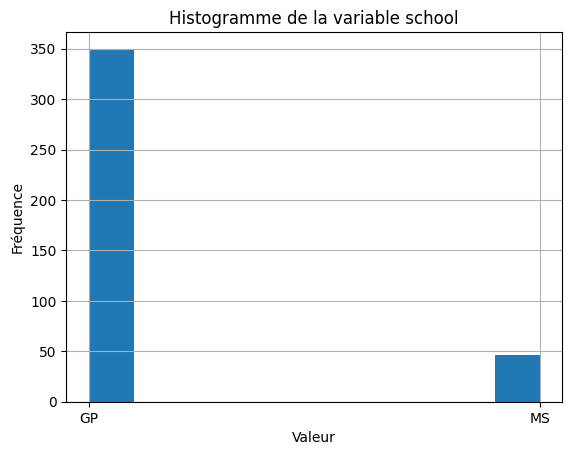

sex


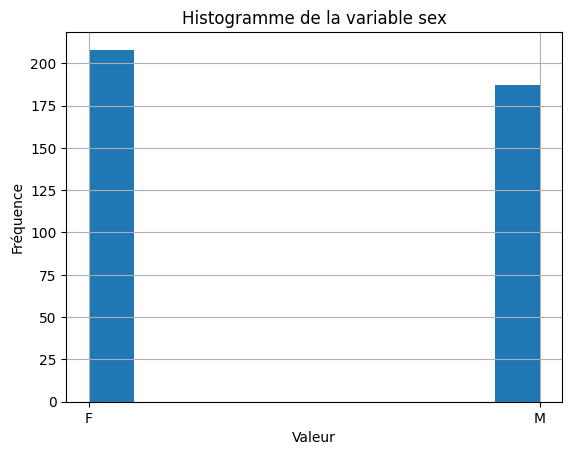

age


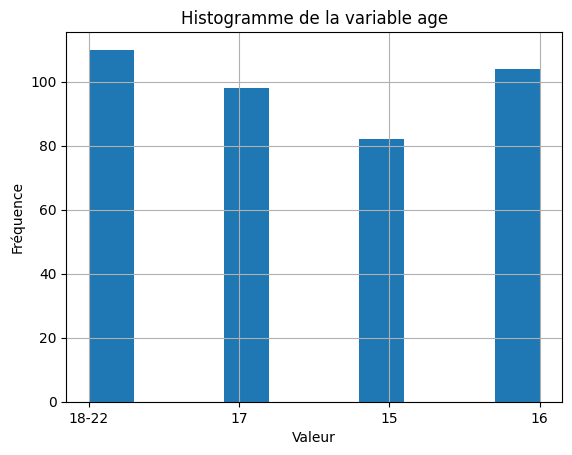

address


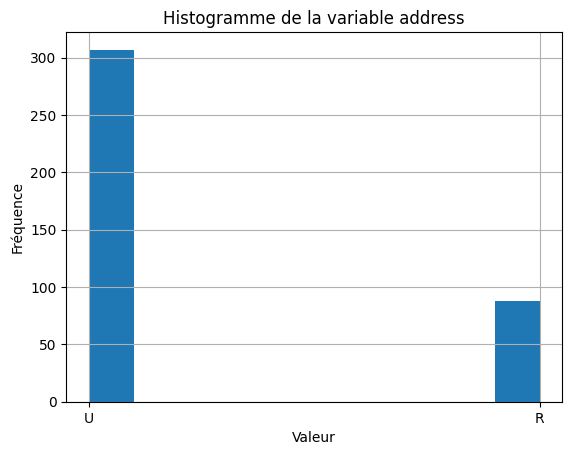

famsize


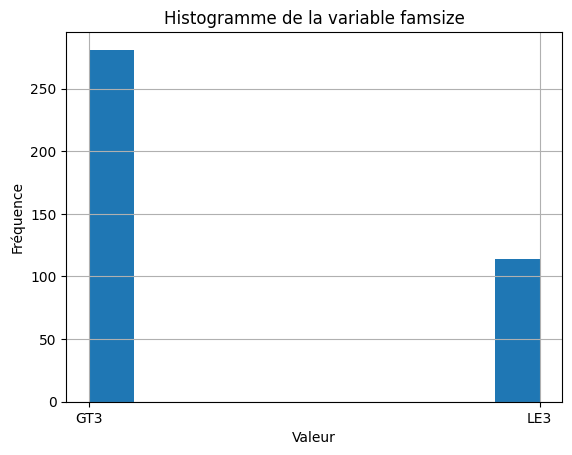

Pstatus


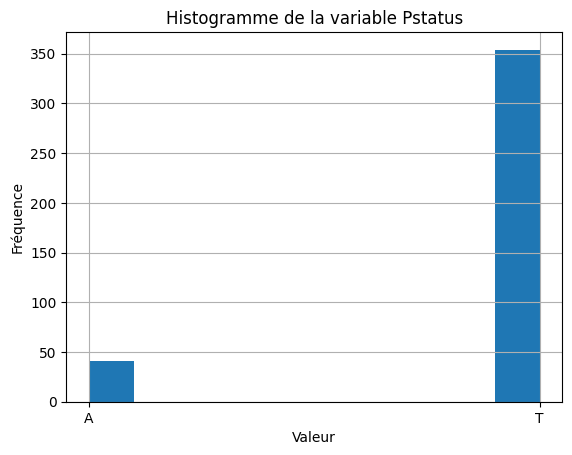

Medu


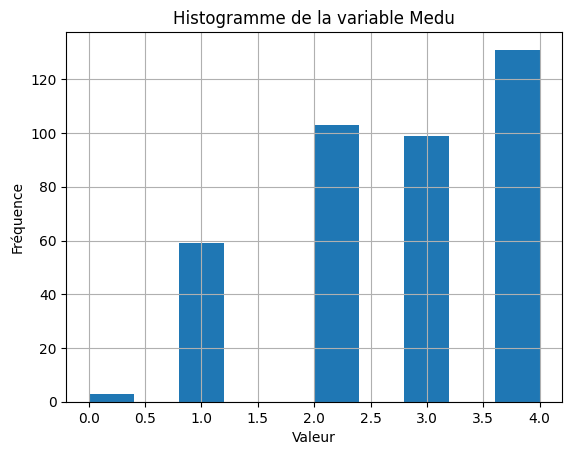

Fedu


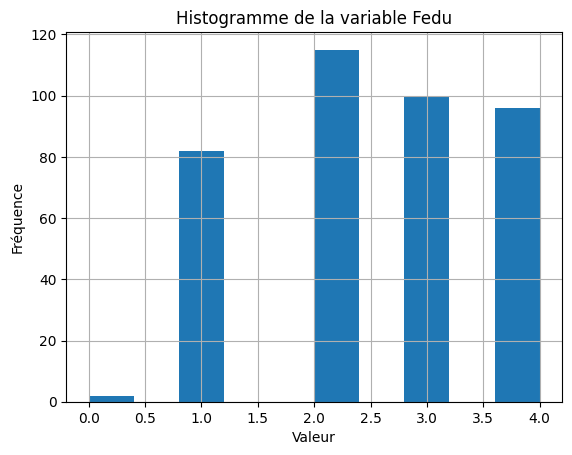

Mjob


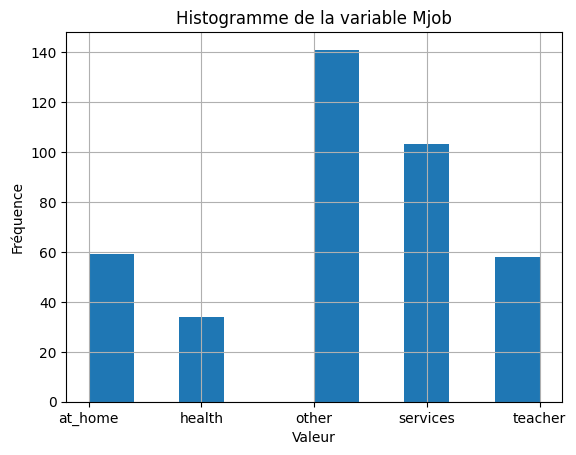

Fjob


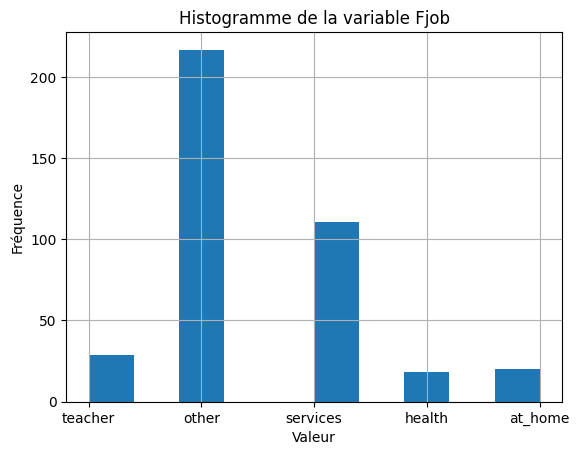

reason


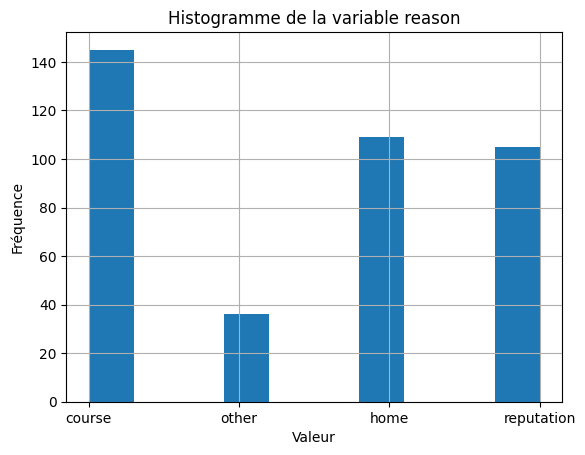

guardian


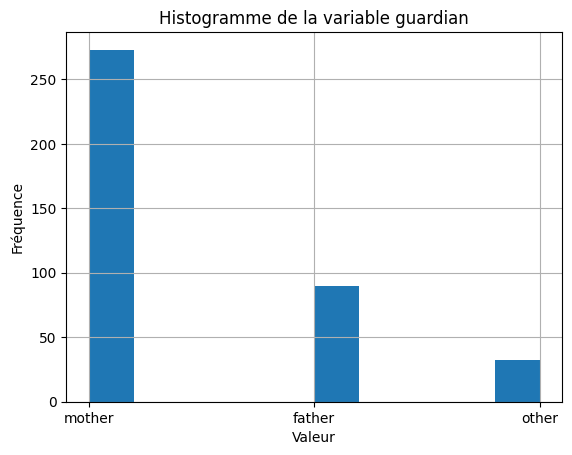

traveltime


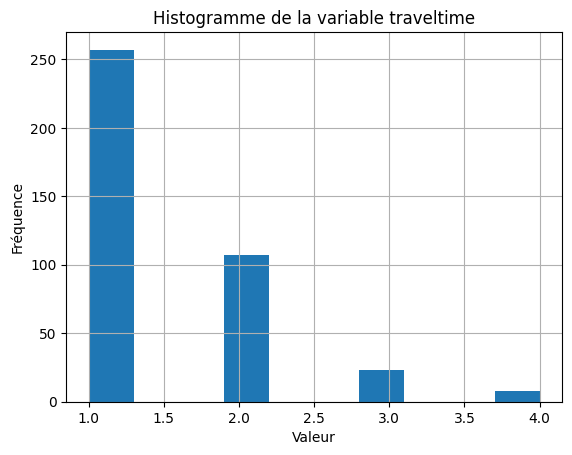

studytime


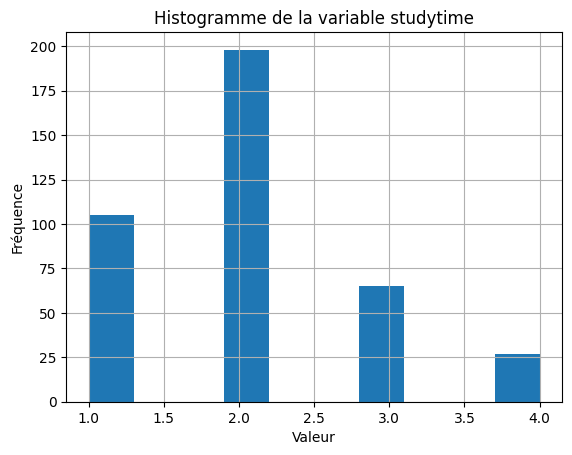

failures


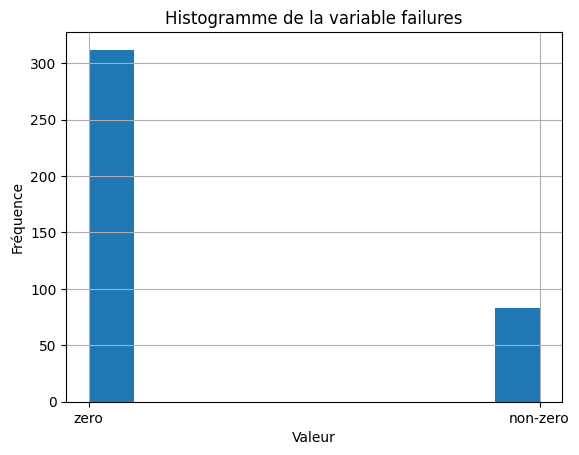

schoolsup


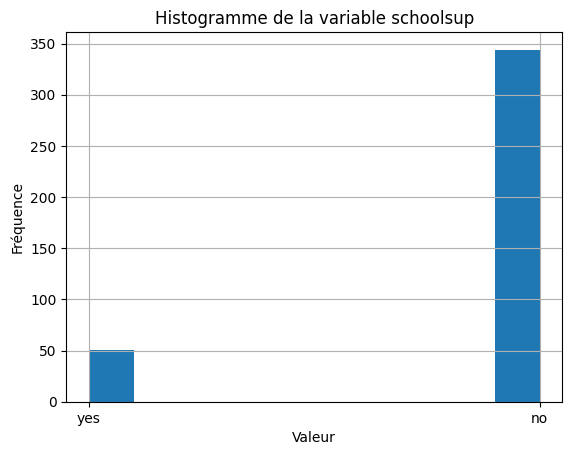

famsup


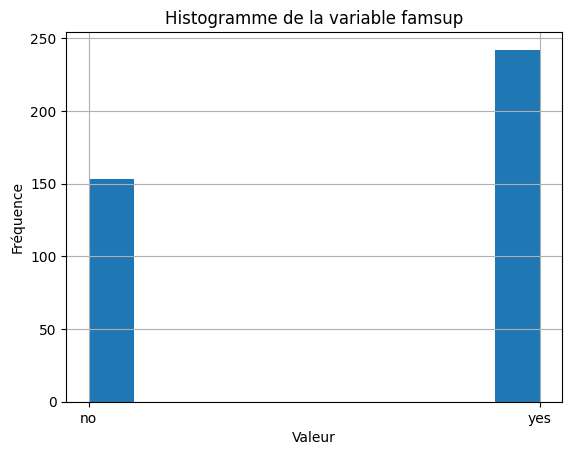

paid


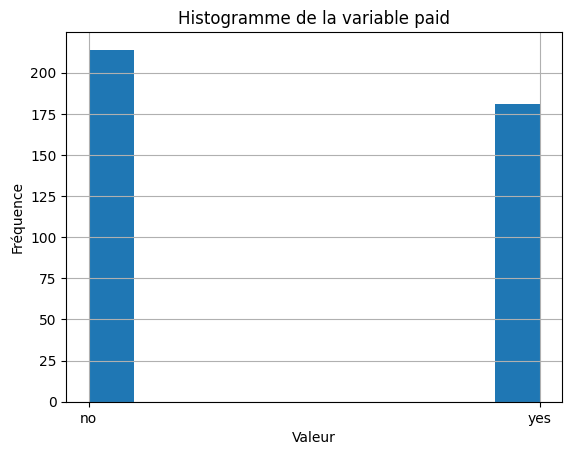

activities


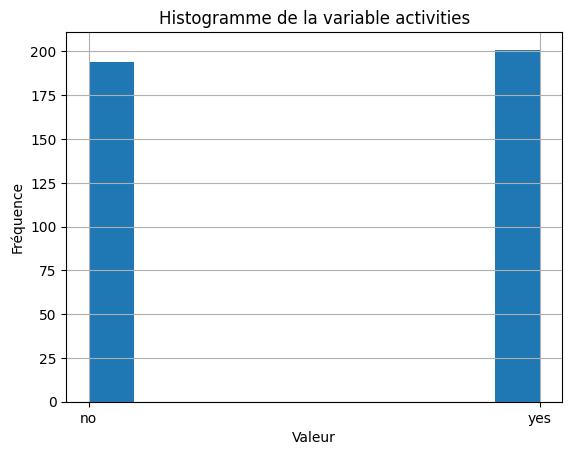

nursery


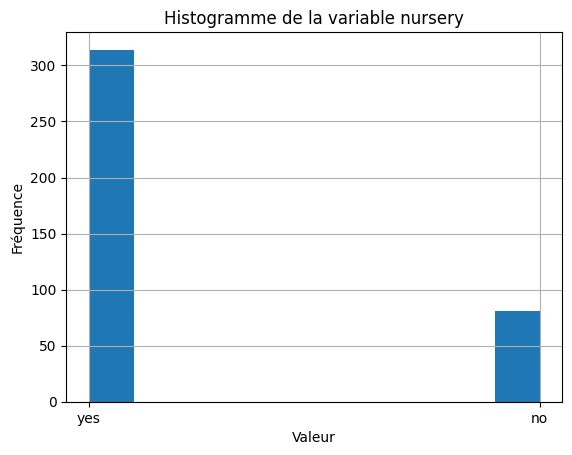

higher


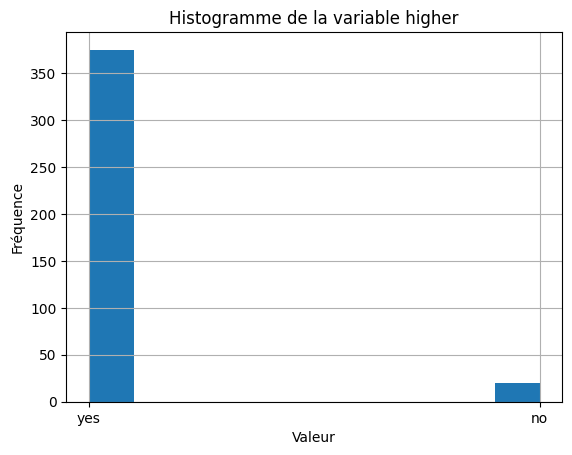

internet


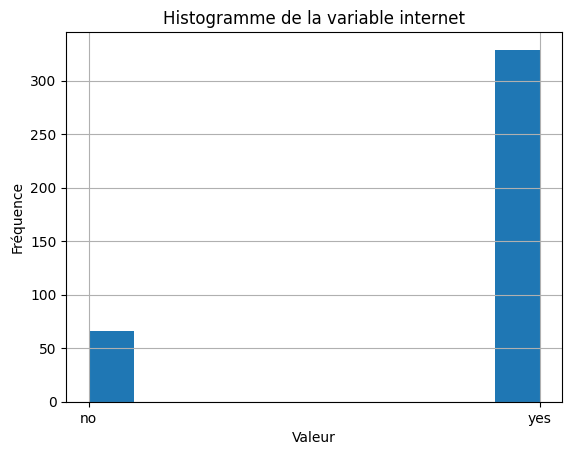

romantic


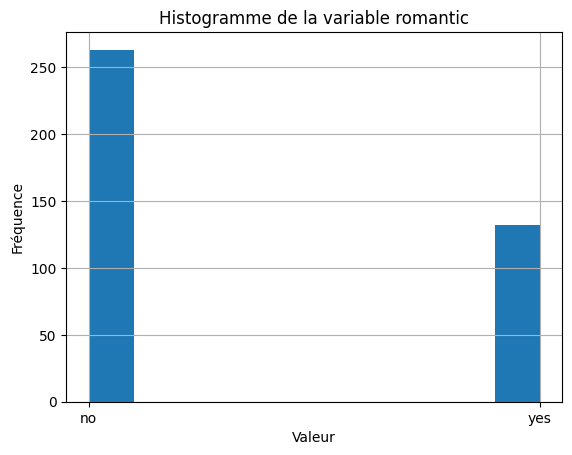

famrel


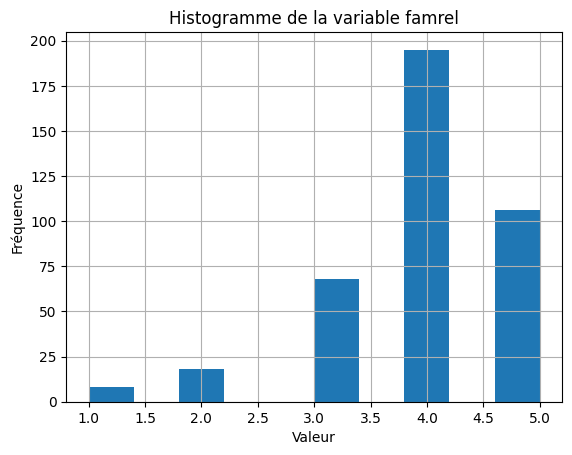

freetime


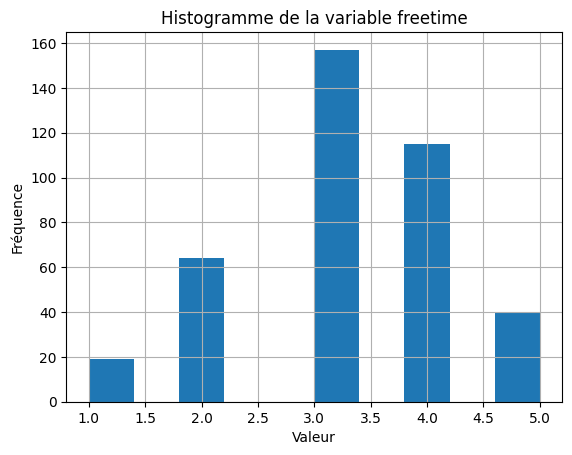

goout


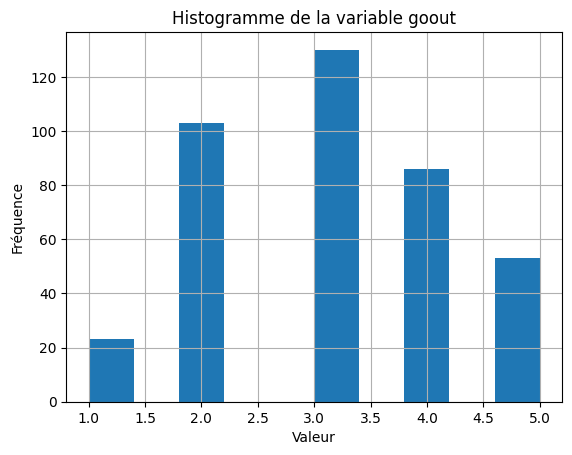

Dalc


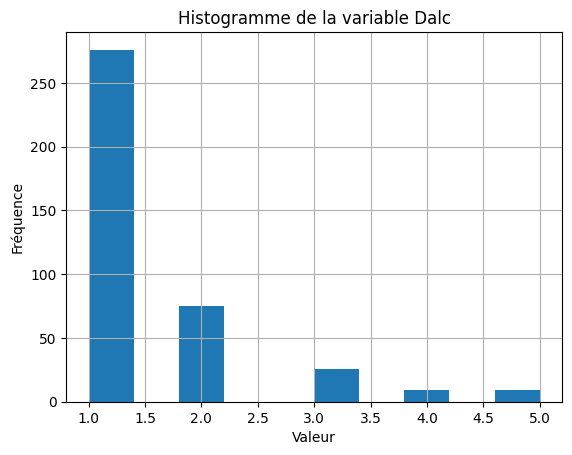

Walc


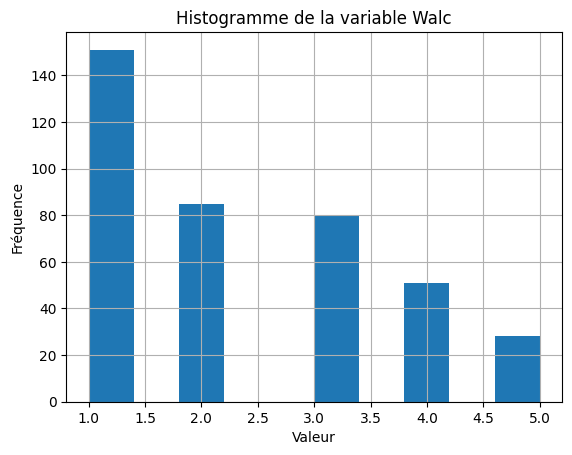

health


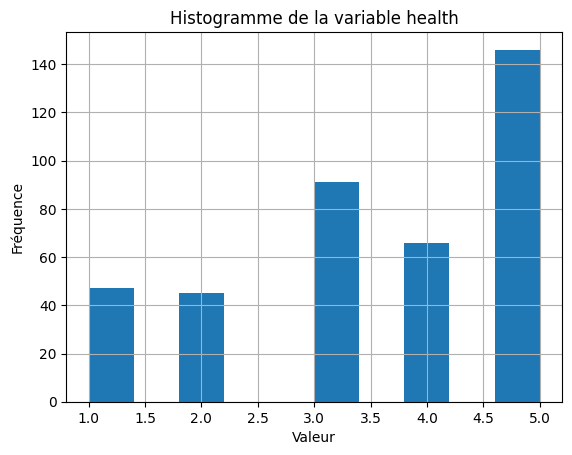

absences


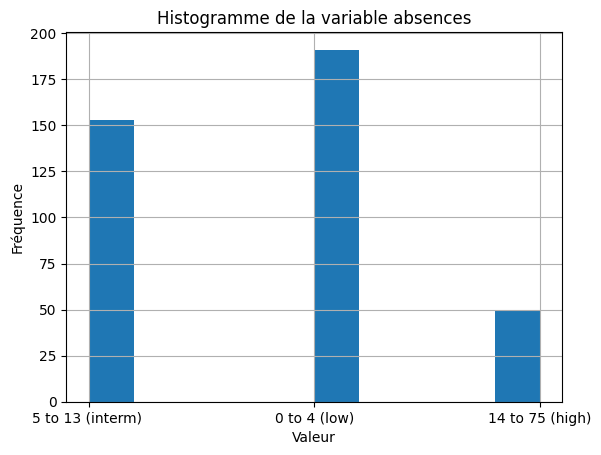

G3


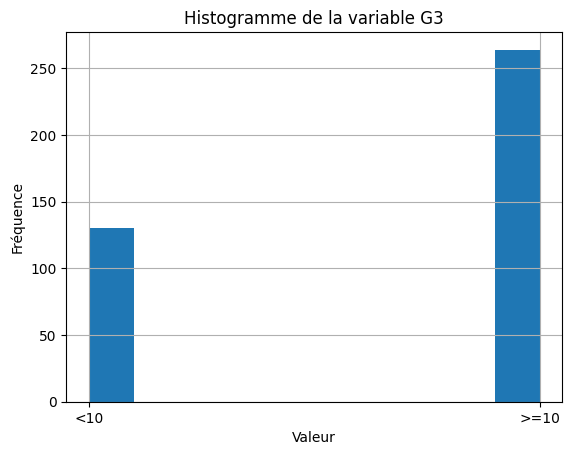

In [397]:
var_quanti = data_new.columns
for col in var_quanti:
  print(col)
  hist = data_new[col].hist(bins=10)
  plt.title("Histogramme de la variable "+ col )
  plt.xlabel("Valeur")
  plt.ylabel("Fréquence")
  plt.show()

In [240]:
data_new.head()

school sex    age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F  18-22       U     GT3       A     4     4  at_home   teacher   
1     GP   F     17       U     GT3       T     1     1  at_home     other   
2     GP   F     15       U     LE3       T     1     1  at_home     other   
3     GP   F     15       U     GT3       T     4     2   health  services   
4     GP   F     16       U     GT3       T     3     3    other     other   

   ... famrel freetime  goout  Dalc Walc health           absences    G1  \
0  ...      4        3      4     1    1      3  5 to 13 (interm)    <10   
1  ...      5        3      3     1    1      3  5 to 13 (interm)    <10   
2  ...      4        3      2     2    3      3  5 to 13 (interm)    <10   
3  ...      3        2      2     1    1      5       0 to 4 (low)  >=10   
4  ...      4        3      2     1    2      5  5 to 13 (interm)    <10   

     G2    G3  
0   <10   <10  
1   <10   <10  
2   <10  >=10  
3  >=10  >=10  
4  >=10  >=10  

[5 rows x 33 columns]

## Calcul de chi2 et Cramer

In [339]:
import pandas as pd
import numpy as np
from scipy import stats

# Create an empty list to store the results
results = []

# Loop through each pair of columns
for i, nom1 in enumerate(data_new.columns):
    for nom2 in data_new.columns:
        if nom1 != nom2:
            # Create the contingency table (crosstab)
            data_crosstab = pd.crosstab(data_new[nom1], data_new[nom2])
            
            # Perform chi2 test
            chi_2, p_value, _, _ = stats.chi2_contingency(data_crosstab, correction=False)
            
            # Calculate Cramér's V
            N = np.sum(data_crosstab)
            minimum_dimension = min(data_crosstab.shape) - 1
            cramer_v = np.sqrt((chi_2 / N) / minimum_dimension)
            
            # Append the results to the list
            results.append({
                'Variable 1': nom1,
                'Variable 2': nom2,
                'Chi2': np.round(chi_2, 2),
                'P-Value': np.round(p_value, 4),
                'Cramér\'s V': np.round(cramer_v, 2)
            })

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **p

     Variable 1 Variable 2    Chi2  P-Value  \
0        school        sex    0.06   0.8071   
1        school        age   64.08   0.0000   
2        school    address   30.92   0.0000   
3        school    famsize    1.66   0.1973   
4        school    Pstatus    0.83   0.3614   
...         ...        ...     ...      ...   
1051         G3       Walc    1.60   0.8092   
1052         G3     health    3.43   0.4882   
1053         G3   absences    9.90   0.0194   
1054         G3         G1  210.61   0.0000   
1055         G3         G2  288.60   0.0000   

                                             Cramér's V  
0                sex
F    0.02
M    0.02
dtype: float64  
1     age
15       0.88
16       0.78
17       0.81
...  
2            address
R    0.59
U    0.32
dtype: float64  
3        famsize
GT3    0.08
LE3    0.12
dtype: float64  
4            Pstatus
A    0.14
T    0.05
dtype: float64  
...                                                 ...  
1051  Walc
1    0.10
2    0.1

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **p

In [340]:
results_df

Variable 1 Variable 2    Chi2  P-Value  \
0        school        sex    0.06   0.8071   
1        school        age   64.08   0.0000   
2        school    address   30.92   0.0000   
3        school    famsize    1.66   0.1973   
4        school    Pstatus    0.83   0.3614   
...         ...        ...     ...      ...   
1051         G3       Walc    1.60   0.8092   
1052         G3     health    3.43   0.4882   
1053         G3   absences    9.90   0.0194   
1054         G3         G1  210.61   0.0000   
1055         G3         G2  288.60   0.0000   

                                             Cramér's V  
0                sex
F    0.02
M    0.02
dtype: float64  
1     age
15       0.88
16       0.78
17       0.81
...  
2            address
R    0.59
U    0.32
dtype: float64  
3        famsize
GT3    0.08
LE3    0.12
dtype: float64  
4            Pstatus
A    0.14
T    0.05
dtype: float64  
...                                                 ...  
1051  Walc
1    0.10
2    0.14
3    0.14
4    0.18
5...  
1052  health
1    0.27
2    0.28
3    0.19
4    0.23...  
1053  absences
0 to 4 (low)         0.23
5 to 13 (in...  
1054  G1
3     14.51
4     14.51
5      5.49
6      ...  
1055  G2
0      4.71
4     16.99
5      4.39
6      ...  

[1056 rows x 5 columns]

In [341]:
import itertools
import scipy.stats as stats
import pandas as pd
import numpy as np

df1 = data_new  # Assuming you already have your data loaded in `data_new`
colonnes = df1.columns

# Define the target variable
target_variable = 'G3'

# Stocker les résultats sous forme de DataFrame
resultats_chi2_manual = []
tri_croise_dict = {}

# Comparer chaque variable avec la variable cible 'G3'
for col1 in colonnes:
    if col1 != target_variable:
        col2 = target_variable
        
        # Créer la table de contingence (tri croisé)
        table_contingence = pd.crosstab(df1[col1], df1[col2])
        
        tri_croise_dict[f"{col1} vs {col2}"] = table_contingence
        
        # Effectifs observés
        obs = table_contingence.values
        
        k, l = table_contingence.shape
        
        # Calcul des effectifs attendus
        row_sums = obs.sum(axis=1).reshape(-1, 1)  # Sommes des lignes
        col_sums = obs.sum(axis=0).reshape(1, -1)  # Sommes des colonnes
        total = obs.sum()  # Total des observations
        
        expected = (row_sums @ col_sums) / total  # Produit matriciel pour obtenir les effectifs attendus
        
        # Calcul du Chi-2 manuellement
        chi2_manual = np.sum((obs - expected) ** 2 / expected)
        
        # Calcul des degrés de liberté
        ddl = (k - 1) * (l - 1)
        
        # Calcul de la p-value associée
        p_value = stats.chi2.sf(chi2_manual, ddl)
        
        # Calcul du V de Cramer
        n = table_contingence.sum().sum()
        v_cram = np.sqrt(chi2_manual / (n * min(k - 1, l - 1)))
        
        # Stocker le résultat
        resultats_chi2_manual.append([col1, col2, chi2_manual, v_cram, p_value])

# Conversion en DataFrame pour affichage structuré
df_chi2_manual = pd.DataFrame(resultats_chi2_manual, columns=['Variable 1', 'Variable 2', 'Chi2', 'V-Cramer', 'p-value'])
df_chi2_manual["p-value"] = df_chi2_manual["p-value"].apply(lambda x: "{:.4f}".format(x) if x >= 0.0001 else "< 0.0001")

# Trier par valeur de Chi-2 décroissante
df_chi2_manual = df_chi2_manual.sort_values(by='Chi2', ascending=False)

# Affichage des tables de contingence (tri croisé)
for key, table in tri_croise_dict.items():
    print(f"Table de contingence: {key}\n", table)

# Affichage du DataFrame final avec interprétation
print(df_chi2_manual)


Table de contingence: school vs G3
 G3      <10  >=10
school           
GP      113   235
MS       17    29
Table de contingence: sex vs G3
 G3   <10  >=10
sex           
F     75   133
M     55   131
Table de contingence: age vs G3
 G3     <10  >=10
age             
15      21    61
16      27    76
17      32    66
18-22   49    61
Table de contingence: address vs G3
 G3       <10  >=10
address           
R         33    55
U         97   209
Table de contingence: famsize vs G3
 G3       <10  >=10
famsize           
GT3       96   184
LE3       34    80
Table de contingence: Pstatus vs G3
 G3       <10  >=10
Pstatus           
A         11    30
T        119   234
Table de contingence: Medu vs G3
 G3    <10  >=10
Medu           
0       1     2
1      25    34
2      36    67
3      35    64
4      33    97
Table de contingence: Fedu vs G3
 G3    <10  >=10
Fedu           
0       0     2
1      35    47
2      38    77
3      33    66
4      24    72
Table de contingence: Mjob vs G3


In [342]:
df_chi2_manual

Variable 1 Variable 2        Chi2  V-Cramer   p-value
31          G2         G3  288.604114  0.855861  < 0.0001
30          G1         G3  210.605213  0.731116  < 0.0001
14    failures         G3   41.828744  0.325829  < 0.0001
25       goout         G3   15.527196  0.198517    0.0037
2          age         G3   10.832018  0.166019    0.0127
29    absences         G3    9.901979  0.158732    0.0194
20      higher         G3    9.761971  0.157406    0.0018
7         Fedu         G3    7.246812  0.135621    0.1234
6         Medu         G3    6.180208  0.125243    0.1861
26        Dalc         G3    5.918365  0.122561    0.2053
11    guardian         G3    5.302843  0.116013    0.0706
8         Mjob         G3    5.002695  0.112682    0.2870
10      reason         G3    4.345124  0.105015    0.2265
24    freetime         G3    3.952767  0.100162    0.4124
15   schoolsup         G3    3.881609  0.099256    0.0488
22    romantic         G3    3.676549  0.096599    0.0552
17        paid         G3    3.515581  0.094461    0.0608
28      health         G3    3.432628  0.093339    0.4882
13   studytime         G3    3.235196  0.090615    0.3568
9         Fjob         G3    2.179279  0.074372    0.7028
23      famrel         G3    2.032893  0.071831    0.7297
1          sex         G3    1.869477  0.068883    0.1715
27        Walc         G3    1.597921  0.063684    0.8092
21    internet         G3    1.468378  0.061048    0.2256
16      famsup         G3    1.286122  0.057134    0.2568
3      address         G3    1.040176  0.051381    0.3078
12  traveltime         G3    1.036539  0.051291    0.7924
5      Pstatus         G3    0.786881  0.044690    0.3750
4      famsize         G3    0.729300  0.043023    0.3931
0       school         G3    0.369710  0.030632    0.5432
18  activities         G3    0.045004  0.010687    0.8320
19     nursery         G3    0.037038  0.009696    0.8474

In [344]:
data_new

school sex    age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F  18-22       U     GT3       A     4     4   at_home   teacher   
1       GP   F     17       U     GT3       T     1     1   at_home     other   
2       GP   F     15       U     LE3       T     1     1   at_home     other   
3       GP   F     15       U     GT3       T     4     2    health  services   
4       GP   F     16       U     GT3       T     3     3     other     other   
..     ...  ..    ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M  18-22       U     LE3       A     2     2  services  services   
391     MS   M     17       U     LE3       T     3     1  services  services   
392     MS   M  18-22       R     GT3       T     1     1     other     other   
393     MS   M  18-22       R     LE3       T     3     2  services     other   
394     MS   M  18-22       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc Walc health           absences  G1  G2  \
0    ...      4        3      4     1    1      3  5 to 13 (interm)    5   6   
1    ...      5        3      3     1    1      3  5 to 13 (interm)    5   5   
2    ...      4        3      2     2    3      3  5 to 13 (interm)    7   8   
3    ...      3        2      2     1    1      5       0 to 4 (low)  15  14   
4    ...      4        3      2     1    2      5  5 to 13 (interm)    6  10   
..   ...    ...      ...    ...   ...  ...    ...                ...  ..  ..   
390  ...      5        5      4     4    5      4  5 to 13 (interm)    9   9   
391  ...      2        4      5     3    4      2       0 to 4 (low)  14  16   
392  ...      5        5      3     3    3      3       0 to 4 (low)  10   8   
393  ...      4        4      1     3    4      5       0 to 4 (low)  11  12   
394  ...      3        2      3     3    3      5  5 to 13 (interm)    8   9   

       G3  
0     <10  
1     <10  
2    >=10  
3    >=10  
4    >=10  
..    ...  
390   <10  
391  >=10  
392   <10  
393  >=10  
394   <10  

[395 rows x 33 columns]

In [345]:
data_new = data_new.drop(columns=['G1', 'G2'])


In [346]:
data_new

school sex    age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F  18-22       U     GT3       A     4     4   at_home   teacher   
1       GP   F     17       U     GT3       T     1     1   at_home     other   
2       GP   F     15       U     LE3       T     1     1   at_home     other   
3       GP   F     15       U     GT3       T     4     2    health  services   
4       GP   F     16       U     GT3       T     3     3     other     other   
..     ...  ..    ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M  18-22       U     LE3       A     2     2  services  services   
391     MS   M     17       U     LE3       T     3     1  services  services   
392     MS   M  18-22       R     GT3       T     1     1     other     other   
393     MS   M  18-22       R     LE3       T     3     2  services     other   
394     MS   M  18-22       U     LE3       T     1     1     other   at_home   

     ... internet romantic  famrel  freetime goout Dalc Walc health  \
0    ...       no       no       4         3     4    1    1      3   
1    ...      yes       no       5         3     3    1    1      3   
2    ...      yes       no       4         3     2    2    3      3   
3    ...      yes      yes       3         2     2    1    1      5   
4    ...       no       no       4         3     2    1    2      5   
..   ...      ...      ...     ...       ...   ...  ...  ...    ...   
390  ...       no       no       5         5     4    4    5      4   
391  ...      yes       no       2         4     5    3    4      2   
392  ...       no       no       5         5     3    3    3      3   
393  ...      yes       no       4         4     1    3    4      5   
394  ...      yes       no       3         2     3    3    3      5   

              absences    G3  
0    5 to 13 (interm)    <10  
1    5 to 13 (interm)    <10  
2    5 to 13 (interm)   >=10  
3         0 to 4 (low)  >=10  
4    5 to 13 (interm)   >=10  
..                 ...   ...  
390  5 to 13 (interm)    <10  
391       0 to 4 (low)  >=10  
392       0 to 4 (low)   <10  
393       0 to 4 (low)  >=10  
394  5 to 13 (interm)    <10  

[395 rows x 31 columns]

In [347]:
data_encoded = pd.get_dummies(data_new, columns=data_new.columns).astype(int)
data_encoded

school_GP  school_MS  sex_F  sex_M  age_15  age_16  age_17  age_18-22  \
0            1          0      1      0       0       0       0          1   
1            1          0      1      0       0       0       1          0   
2            1          0      1      0       1       0       0          0   
3            1          0      1      0       1       0       0          0   
4            1          0      1      0       0       1       0          0   
..         ...        ...    ...    ...     ...     ...     ...        ...   
390          0          1      0      1       0       0       0          1   
391          0          1      0      1       0       0       1          0   
392          0          1      0      1       0       0       0          1   
393          0          1      0      1       0       0       0          1   
394          0          1      0      1       0       0       0          1   

     address_R  address_U  ...  health_2  health_3  health_4  health_5  \
0            0          1  ...         0         1         0         0   
1            0          1  ...         0         1         0         0   
2            0          1  ...         0         1         0         0   
3            0          1  ...         0         0         0         1   
4            0          1  ...         0         0         0         1   
..         ...        ...  ...       ...       ...       ...       ...   
390          0          1  ...         0         0         1         0   
391          0          1  ...         1         0         0         0   
392          1          0  ...         0         1         0         0   
393          1          0  ...         0         0         0         1   
394          0          1  ...         0         0         0         1   

     absences_0 to 4 (low)  absences_5 to 13 (interm)   \
0                        0                           1   
1                        0                           1   
2                        0                           1   
3                        1                           0   
4                        0                           1   
..                     ...                         ...   
390                      0                           1   
391                      1                           0   
392                      1                           0   
393                      1                           0   
394                      0                           1   

     absences_14 to 30 (high)  absences_38 to 75 (v_high)  G3_<10  G3_>=10  
0                           0                           0       1        0  
1                           0                           0       1        0  
2                           0                           0       0        1  
3                           0                           0       0        1  
4                           0                           0       0        1  
..                        ...                         ...     ...      ...  
390                         0                           0       1        0  
391                         0                           0       0        1  
392                         0                           0       1        0  
393                         0                           0       0        1  
394                         0                           0       1        0  

[395 rows x 103 columns]

### Tri à plat

In [398]:
# Tri à plat sur les features
tri_plat = {col: data_new[col].value_counts().to_frame() for col in data_new.columns}

for col, df in tri_plat.items():
    print(f"\n--- {col} ---")
    print(df)


--- school ---
        count
school       
GP        349
MS         46

--- sex ---
     count
sex       
F      208
M      187

--- age ---
       count
age         
18-22    110
16       104
17        98
15        82

--- address ---
         count
address       
U          307
R           88

--- famsize ---
         count
famsize       
GT3        281
LE3        114

--- Pstatus ---
         count
Pstatus       
T          354
A           41

--- Medu ---
      count
Medu       
4       131
2       103
3        99
1        59
0         3

--- Fedu ---
      count
Fedu       
2       115
3       100
4        96
1        82
0         2

--- Mjob ---
          count
Mjob           
other       141
services    103
at_home      59
teacher      58
health       34

--- Fjob ---
          count
Fjob           
other       217
services    111
teacher      29
at_home      20
health       18

--- reason ---
            count
reason           
course        145
home          109
reputation   

### Tri Croisé

In [349]:
#Tri croisé sur les features
cols = data_new.columns
tri_croise = {f"{col1} vs {col2}": pd.crosstab(data_new[col1], data_new[col2])
              for i, col1 in enumerate(cols) for col2 in cols[i+1:]}

for key, df in tri_croise.items():
    print(f"\n--- {key} ---")
    print(df)


--- school vs sex ---
sex       F    M
school          
GP      183  166
MS       25   21

--- school vs age ---
age     15   16  17  18-22
school                    
GP      82  104  86     76
MS       0    0  12     34

--- school vs address ---
address   R    U
school          
GP       63  286
MS       25   21

--- school vs famsize ---
famsize  GT3  LE3
school           
GP       252   97
MS        29   17

--- school vs Pstatus ---
Pstatus   A    T
school          
GP       38  311
MS        3   43

--- school vs Medu ---
Medu    0   1   2   3    4
school                    
GP      3  42  96  88  120
MS      0  17   7  11   11

--- school vs Fedu ---
Fedu    0   1    2   3   4
school                    
GP      2  67  103  90  87
MS      0  15   12  10   9

--- school vs Mjob ---
Mjob    at_home  health  other  services  teacher
school                                           
GP           49      32    122        94       52
MS           10       2     19         9        6



## ACM : valeurs propres, contributions et cos2 des modalités aux 2 axes


In [350]:
data_encoded_no_predi=data_encoded.iloc[:,:-2]


In [351]:
data_encoded_no_predi

school_GP  school_MS  sex_F  sex_M  age_15  age_16  age_17  age_18-22  \
0            1          0      1      0       0       0       0          1   
1            1          0      1      0       0       0       1          0   
2            1          0      1      0       1       0       0          0   
3            1          0      1      0       1       0       0          0   
4            1          0      1      0       0       1       0          0   
..         ...        ...    ...    ...     ...     ...     ...        ...   
390          0          1      0      1       0       0       0          1   
391          0          1      0      1       0       0       1          0   
392          0          1      0      1       0       0       0          1   
393          0          1      0      1       0       0       0          1   
394          0          1      0      1       0       0       0          1   

     address_R  address_U  ...  Walc_5  health_1  health_2  health_3  \
0            0          1  ...       0         0         0         1   
1            0          1  ...       0         0         0         1   
2            0          1  ...       0         0         0         1   
3            0          1  ...       0         0         0         0   
4            0          1  ...       0         0         0         0   
..         ...        ...  ...     ...       ...       ...       ...   
390          0          1  ...       1         0         0         0   
391          0          1  ...       0         0         1         0   
392          1          0  ...       0         0         0         1   
393          1          0  ...       0         0         0         0   
394          0          1  ...       0         0         0         0   

     health_4  health_5  absences_0 to 4 (low)  absences_5 to 13 (interm)   \
0           0         0                      0                           1   
1           0         0                      0                           1   
2           0         0                      0                           1   
3           0         1                      1                           0   
4           0         1                      0                           1   
..        ...       ...                    ...                         ...   
390         1         0                      0                           1   
391         0         0                      1                           0   
392         0         0                      1                           0   
393         0         1                      1                           0   
394         0         1                      0                           1   

     absences_14 to 30 (high)  absences_38 to 75 (v_high)  
0                           0                           0  
1                           0                           0  
2                           0                           0  
3                           0                           0  
4                           0                           0  
..                        ...                         ...  
390                         0                           0  
391                         0                           0  
392                         0                           0  
393                         0                           0  
394                         0                           0  

[395 rows x 101 columns]

In [352]:
data_encoded_no_predi.columns.values

array(['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age_15', 'age_16',
       'age_17', 'age_18-22', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu_0', 'Medu_1',
       'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_0', 'Fedu_1', 'Fedu_2',
       'Fedu_3', 'Fedu_4', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other',
       'traveltime_1', 'traveltime_2', 'traveltime_3', 'traveltime_4',
       'studytime_1', 'studytime_2', 'studytime_3', 'studytime_4',
       'failures_non-zero', 'failures_zero', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet

In [353]:
ca = CA(col_labels=data_encoded_no_predi.columns.values)
ca.fit(data_encoded_no_predi.values)

CA(col_labels=array(['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age_15', 'age_16',
       'age_17', 'age_18-22', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu_0', 'Medu_1',
       'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_0', 'Fedu_1', 'Fedu_2',
       'Fedu_3', 'Fedu_4', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_ho...
       'famrel_4', 'famrel_5', 'freetime_1', 'freetime_2', 'freetime_3',
       'freetime_4', 'freetime_5', 'goout_1', 'goout_2', 'goout_3',
       'goout_4', 'goout_5', 'Dalc_1', 'Dalc_2', 'Dalc_3', 'Dalc_4',
       'Dalc_5', 'Walc_1', 'Walc_2', 'Walc_3', 'Walc_4', 'Walc_5',
       'health_1', 'health_2', 'health_3', 'health_4', 'health_5',
       'absences_0 to 4 (low)', 'absences_5 to 13 (interm) ',
       'absences_14 to 30 (high)', 'absences_38 to 75 (v_high)'],
      dtype=object))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


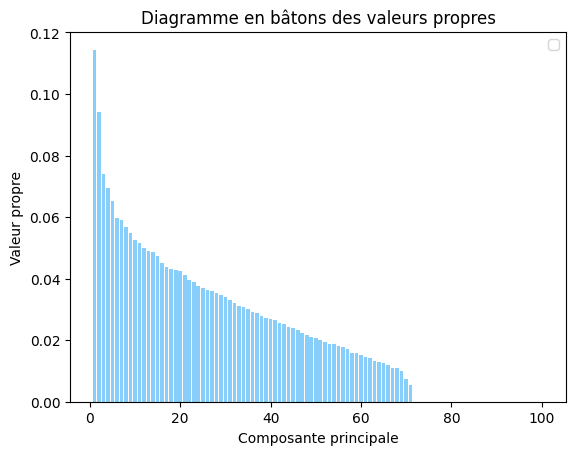

In [354]:
eigenvalues = ca.eig_[0]

plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, color='lightskyblue') 


plt.title('Diagramme en bâtons des valeurs propres')
plt.xlabel('Composante principale')
plt.ylabel('Valeur propre')
plt.legend()
plt.show()

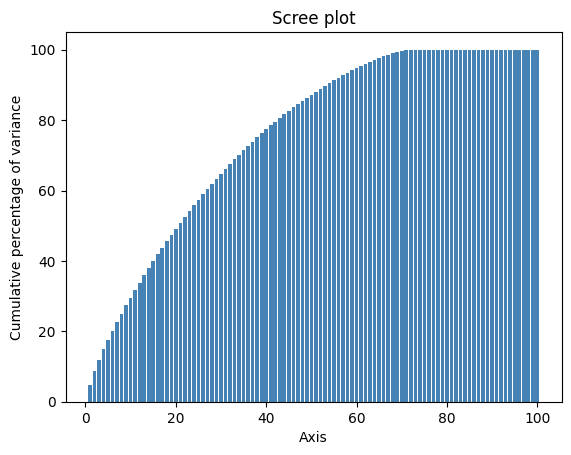

In [355]:
ca.plot_eigenvalues(type="cumulative")

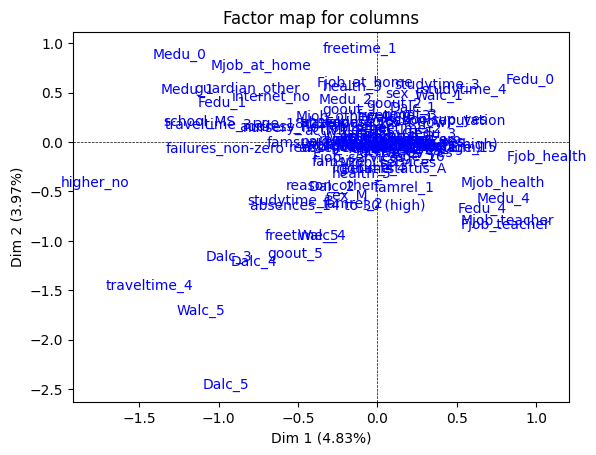

In [356]:
ca.mapping_col(num_x_axis=1, num_y_axis=2)

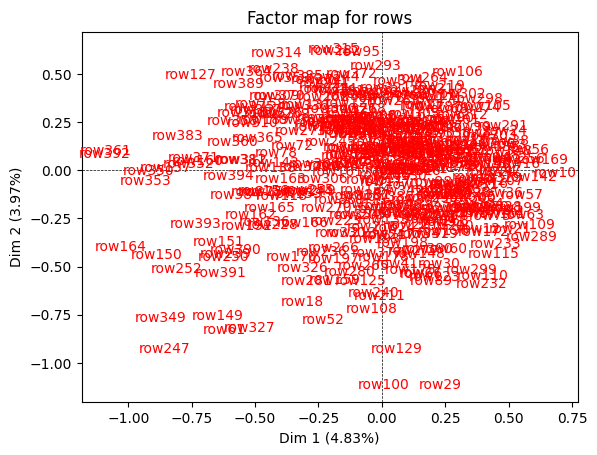

In [357]:
ca.mapping_row(num_x_axis=1, num_y_axis=2)

In [358]:
print(ca.col_labels_)

['school_GP' 'school_MS' 'sex_F' 'sex_M' 'age_15' 'age_16' 'age_17'
 'age_18-22' 'address_R' 'address_U' 'famsize_GT3' 'famsize_LE3'
 'Pstatus_A' 'Pstatus_T' 'Medu_0' 'Medu_1' 'Medu_2' 'Medu_3' 'Medu_4'
 'Fedu_0' 'Fedu_1' 'Fedu_2' 'Fedu_3' 'Fedu_4' 'Mjob_at_home' 'Mjob_health'
 'Mjob_other' 'Mjob_services' 'Mjob_teacher' 'Fjob_at_home' 'Fjob_health'
 'Fjob_other' 'Fjob_services' 'Fjob_teacher' 'reason_course' 'reason_home'
 'reason_other' 'reason_reputation' 'guardian_father' 'guardian_mother'
 'guardian_other' 'traveltime_1' 'traveltime_2' 'traveltime_3'
 'traveltime_4' 'studytime_1' 'studytime_2' 'studytime_3' 'studytime_4'
 'failures_non-zero' 'failures_zero' 'schoolsup_no' 'schoolsup_yes'
 'famsup_no' 'famsup_yes' 'paid_no' 'paid_yes' 'activities_no'
 'activities_yes' 'nursery_no' 'nursery_yes' 'higher_no' 'higher_yes'
 'internet_no' 'internet_yes' 'romantic_no' 'romantic_yes' 'famrel_1'
 'famrel_2' 'famrel_3' 'famrel_4' 'famrel_5' 'freetime_1' 'freetime_2'
 'freetime_3' 'freetime_

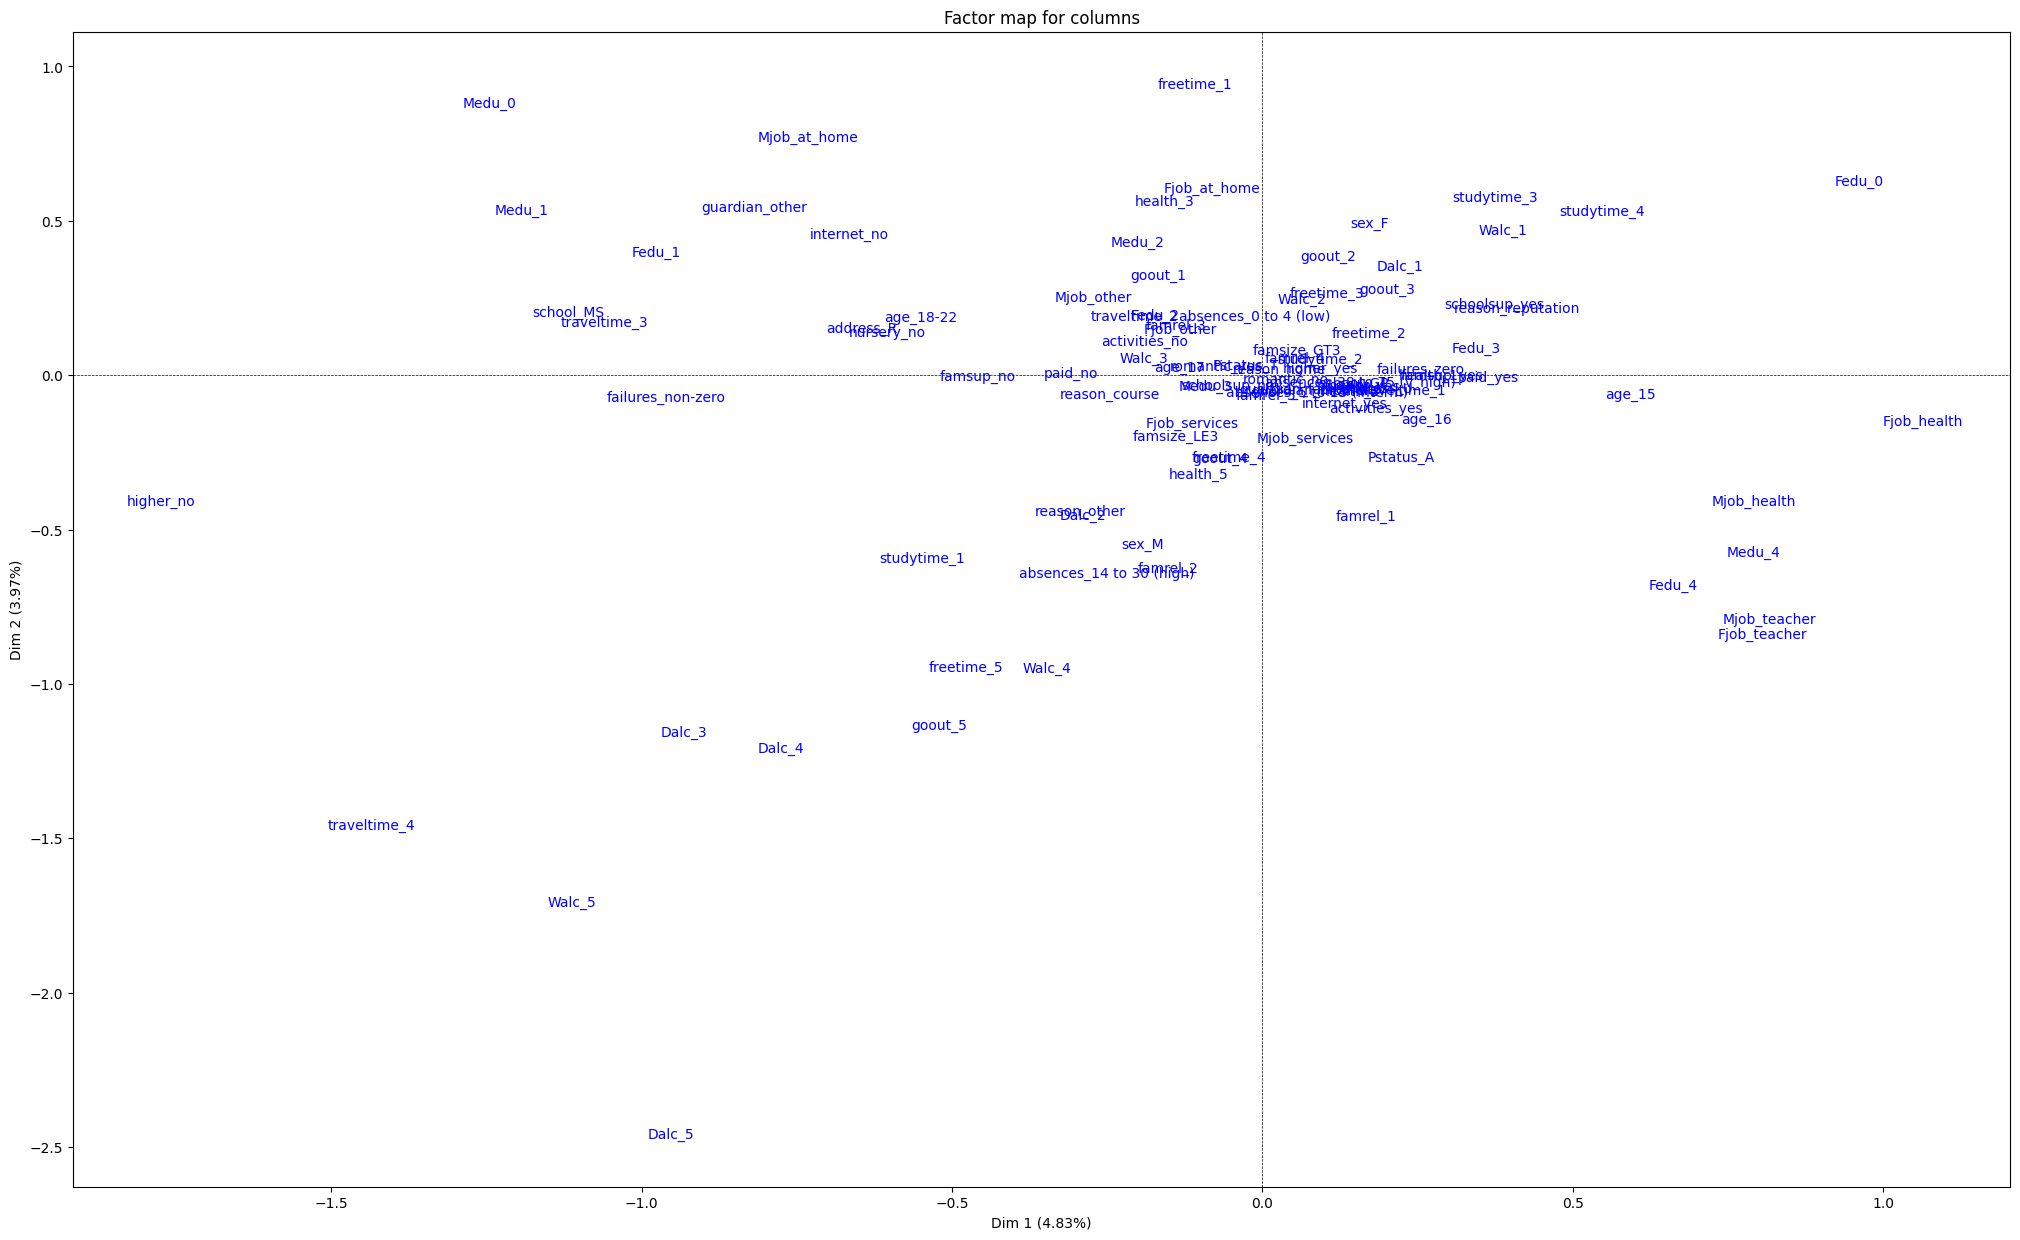

In [399]:
ca.mapping_col(num_x_axis=1, num_y_axis=2, figsize=(25,15))

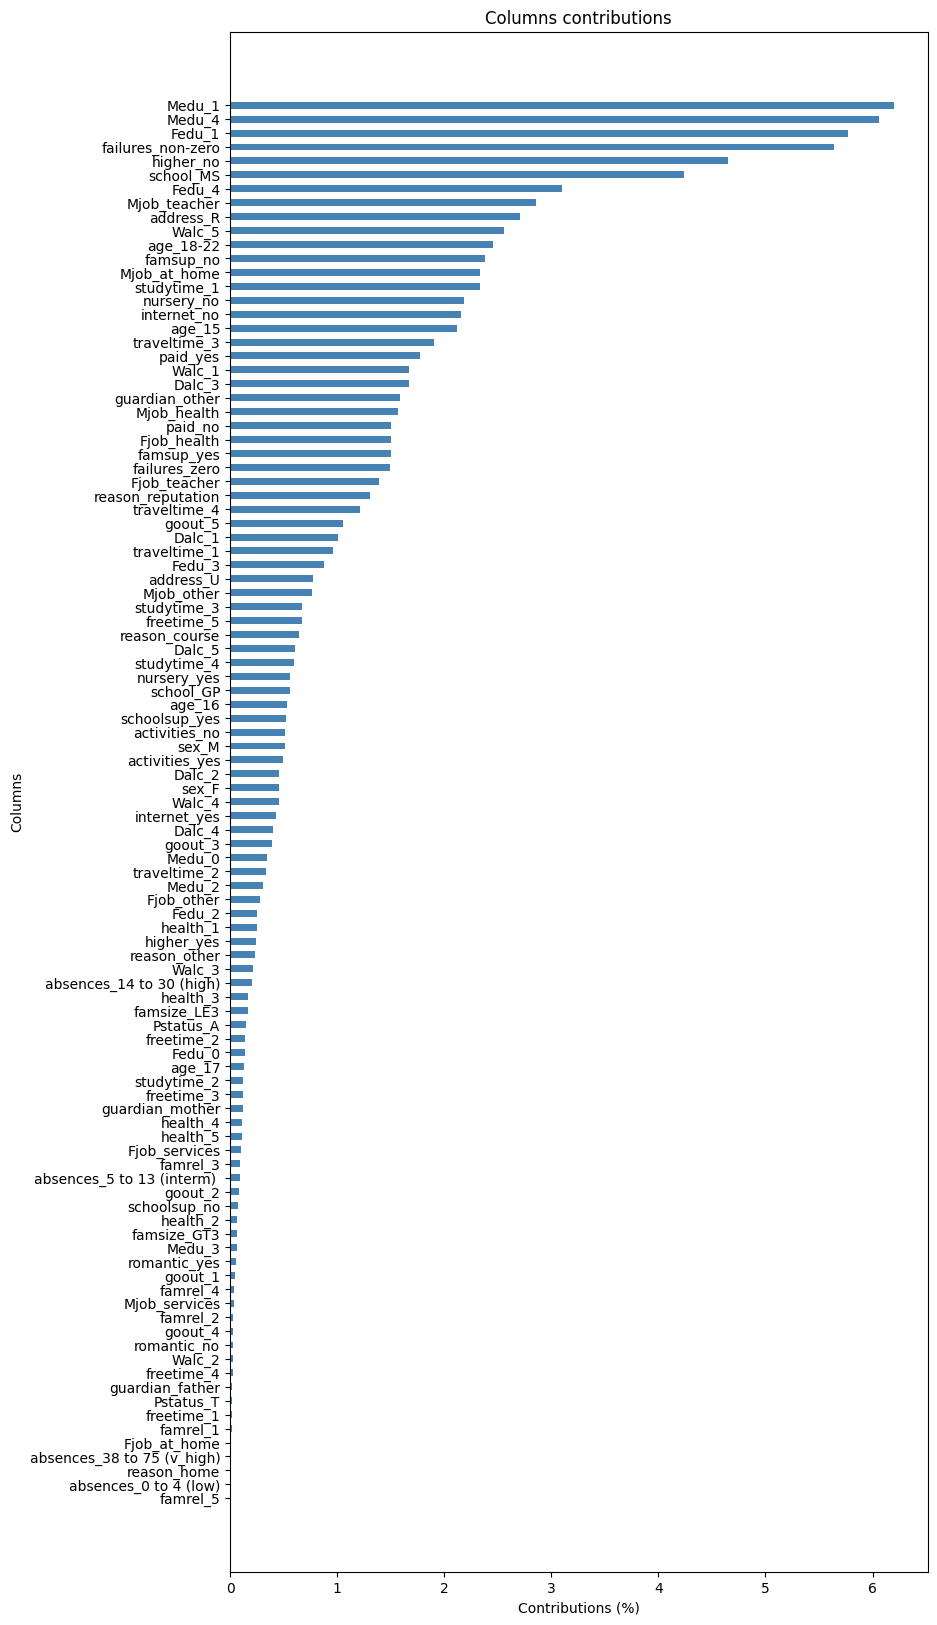

In [400]:
ca.plot_col_contrib(num_axis=1, figsize=(9,20)) # contributions des modalités à l'axe 1

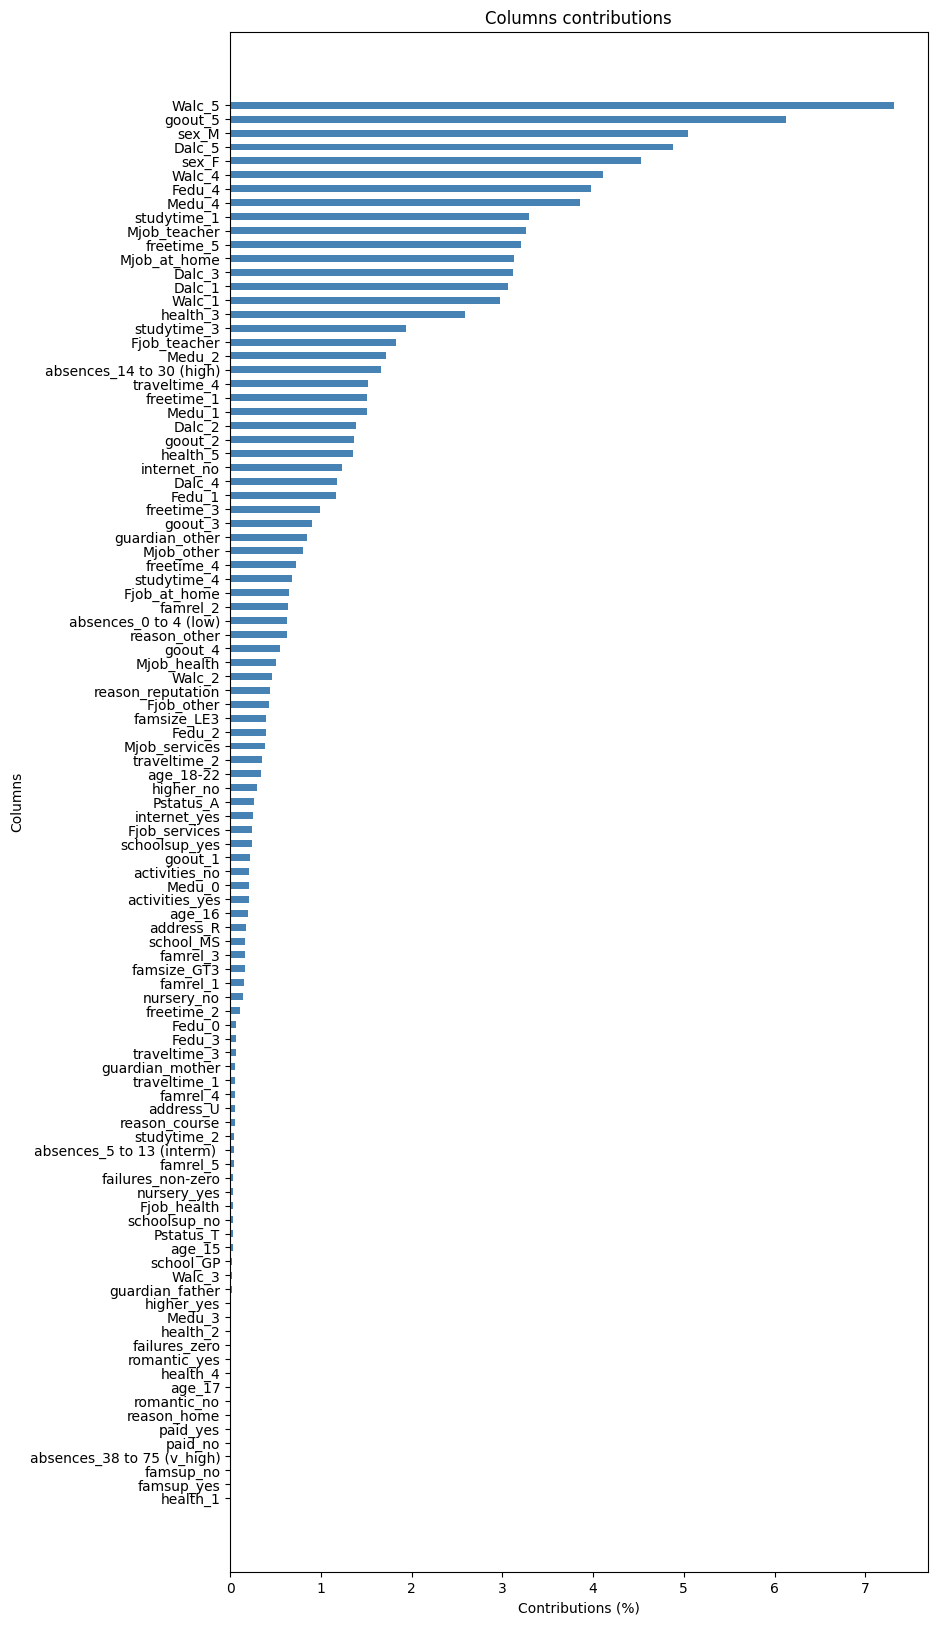

In [401]:
ca.plot_col_contrib(num_axis=2, figsize=(9,20)) # contributions des modalités à l'axe 2

In [402]:
# cos2 des modalités sur les deux premiers axes
col_cos2 = pd.DataFrame(ca.col_cos2_[:,:2], columns=['Axe 1', 'Axe 2'], index=data_encoded.columns[:-2])

# afficher les cos2 supérieurs à 0.3 sur le premier axe
col_cos2_high = col_cos2[col_cos2['Axe 1'] > 0.2]
print("Modalités qui ont les cos2 les plus élevés sur l'axe 1")
print(col_cos2_high)
print('-'*50)

# afficher les cos2 supérieurs à 0.3 sur le deuxième axe
col_cos2_high = col_cos2[col_cos2['Axe 2'] > 0.2]
print("Modalités qui ont les cos2 les plus élevés sur l'axe 2")
print(col_cos2_high)

Modalités qui ont les cos2 les plus élevés sur l'axe 1
                      Axe 1     Axe 2
Medu_1             0.250251  0.050072
Medu_4             0.311351  0.163072
Fedu_1             0.249898  0.041624
failures_non-zero  0.245052  0.001345
failures_zero      0.244427  0.001315
--------------------------------------------------
Modalités qui ont les cos2 les plus élevés sur l'axe 2
           Axe 1     Axe 2
sex_F   0.033112  0.270146
sex_M   0.033342  0.270494
Dalc_1  0.114550  0.287252
Walc_5  0.094277  0.222044


In [403]:
i=0
for variable in data_encoded_no_predi:
    print(f"Variable : {variable}")
    a = np.sum(data_encoded_no_predi[variable]==1)/(len(data_encoded_no_predi)*15)
    print("Poids", np.round(a,3)*100, "%")
    print("Contribution à l'axe 1", np.round(ca.col_contrib_[:, 0][i],2), "%")
    print("Contribution à l'axe 2", np.round(ca.col_contrib_[:, 1][i],2), "%")
    if np.round(ca.col_contrib_[:, 0][i],2) >= np.round(a,3)*100 or np.round(ca.col_contrib_[:, 1][i],2) >= np.round(a,3)*100:
      print("Variable significative")
    else:
      print("Variable non significative")
    i+=1
    print("-"*20)

Variable : school_GP
Poids 5.8999999999999995 %
Contribution à l'axe 1 0.56 %
Contribution à l'axe 2 0.02 %
Variable non significative
--------------------
Variable : school_MS
Poids 0.8 %
Contribution à l'axe 1 4.24 %
Contribution à l'axe 2 0.17 %
Variable significative
--------------------
Variable : sex_F
Poids 3.5000000000000004 %
Contribution à l'axe 1 0.46 %
Contribution à l'axe 2 4.53 %
Variable significative
--------------------
Variable : sex_M
Poids 3.2 %
Contribution à l'axe 1 0.51 %
Contribution à l'axe 2 5.05 %
Variable significative
--------------------
Variable : age_15
Poids 1.4000000000000001 %
Contribution à l'axe 1 2.12 %
Contribution à l'axe 2 0.03 %
Variable significative
--------------------
Variable : age_16
Poids 1.7999999999999998 %
Contribution à l'axe 1 0.53 %
Contribution à l'axe 2 0.19 %
Variable non significative
--------------------
Variable : age_17
Poids 1.7000000000000002 %
Contribution à l'axe 1 0.13 %
Contribution à l'axe 2 0.01 %
Variable non signif

In [404]:
## ca.row_topandas().iloc[:,:30]

In [405]:
contributions = ca.col_contrib_[0]
sorted_indices = np.argsort(contributions)[::-1]
contributions = contributions[sorted_indices]

rounded_contributions = np.round(contributions, 3)
formatted_contributions = [np.format_float_positional(val) for val in rounded_contributions]

print("Contributions à l'axe 1 :", formatted_contributions) # pour voir l'ordre de grandeur des contributions

Contributions à l'axe 1 : ['87.725', '1.401', '1.129', '0.971', '0.85', '0.772', '0.556', '0.529', '0.427', '0.422', '0.42', '0.333', '0.31', '0.309', '0.29', '0.258', '0.218', '0.198', '0.196', '0.185', '0.173', '0.171', '0.155', '0.155', '0.142', '0.135', '0.134', '0.131', '0.104', '0.1', '0.094', '0.089', '0.085', '0.081', '0.072', '0.066', '0.063', '0.04', '0.039', '0.039', '0.034', '0.034', '0.027', '0.026', '0.026', '0.026', '0.026', '0.025', '0.025', '0.024', '0.023', '0.021', '0.019', '0.015', '0.015', '0.011', '0.011', '0.011', '0.005', '0.005', '0.004', '0.004', '0.003', '0.002', '0.002', '0.002', '0.001', '0.001', '0.001', '0.001', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.', '0.']


## Variable supplémentaire : calcul de la projection dans le plan factoriel

In [430]:
df_bin= data_encoded

In [431]:
data_encoded.head()

school_GP  school_MS  sex_F  sex_M  age_15  age_16  age_17  age_18-22  \
0          1          0      1      0       0       0       0          1   
1          1          0      1      0       0       0       1          0   
2          1          0      1      0       1       0       0          0   
3          1          0      1      0       1       0       0          0   
4          1          0      1      0       0       1       0          0   

   address_R  address_U  ...  health_2  health_3  health_4  health_5  \
0          0          1  ...         0         1         0         0   
1          0          1  ...         0         1         0         0   
2          0          1  ...         0         1         0         0   
3          0          1  ...         0         0         0         1   
4          0          1  ...         0         0         0         1   

   absences_0 to 4 (low)  absences_5 to 13 (interm)   \
0                      0                           1   
1                      0                           1   
2                      0                           1   
3                      1                           0   
4                      0                           1   

   absences_14 to 30 (high)  absences_38 to 75 (v_high)  G3_<10  G3_>=10  
0                         0                           0       1        0  
1                         0                           0       1        0  
2                         0                           0       0        1  
3                         0                           0       0        1  
4                         0                           0       0        1  

[5 rows x 103 columns]

In [432]:
burt=data_encoded.iloc[:,:-2].T @ data_encoded.iloc[:,-2:]
burt.T

school_GP  school_MS  sex_F  sex_M  age_15  age_16  age_17  \
G3_<10         113         17     75     55      21      27      32   
G3_>=10        235         29    133    131      61      76      66   

         age_18-22  address_R  address_U  ...  Walc_5  health_1  health_2  \
G3_<10          49         33         97  ...      10        10        15   
G3_>=10         61         55        209  ...      18        37        29   

         health_3  health_4  health_5  absences_0 to 4 (low)  \
G3_<10         31        24        50                     64   
G3_>=10        60        42        96                    127   

         absences_5 to 13 (interm)   absences_14 to 30 (high)  \
G3_<10                           40                        22   
G3_>=10                         112                        23   

         absences_38 to 75 (v_high)  
G3_<10                            3  
G3_>=10                           2  

[2 rows x 101 columns]

In [433]:
coords = ca.transform(burt.T)
print(coords[:, :2])

[[-0.10019373  0.00631437]
 [ 0.04755164 -0.00310468]]


In [434]:
valeurs_rows = ca.row_topandas()
valeurs_col = ca.col_topandas()

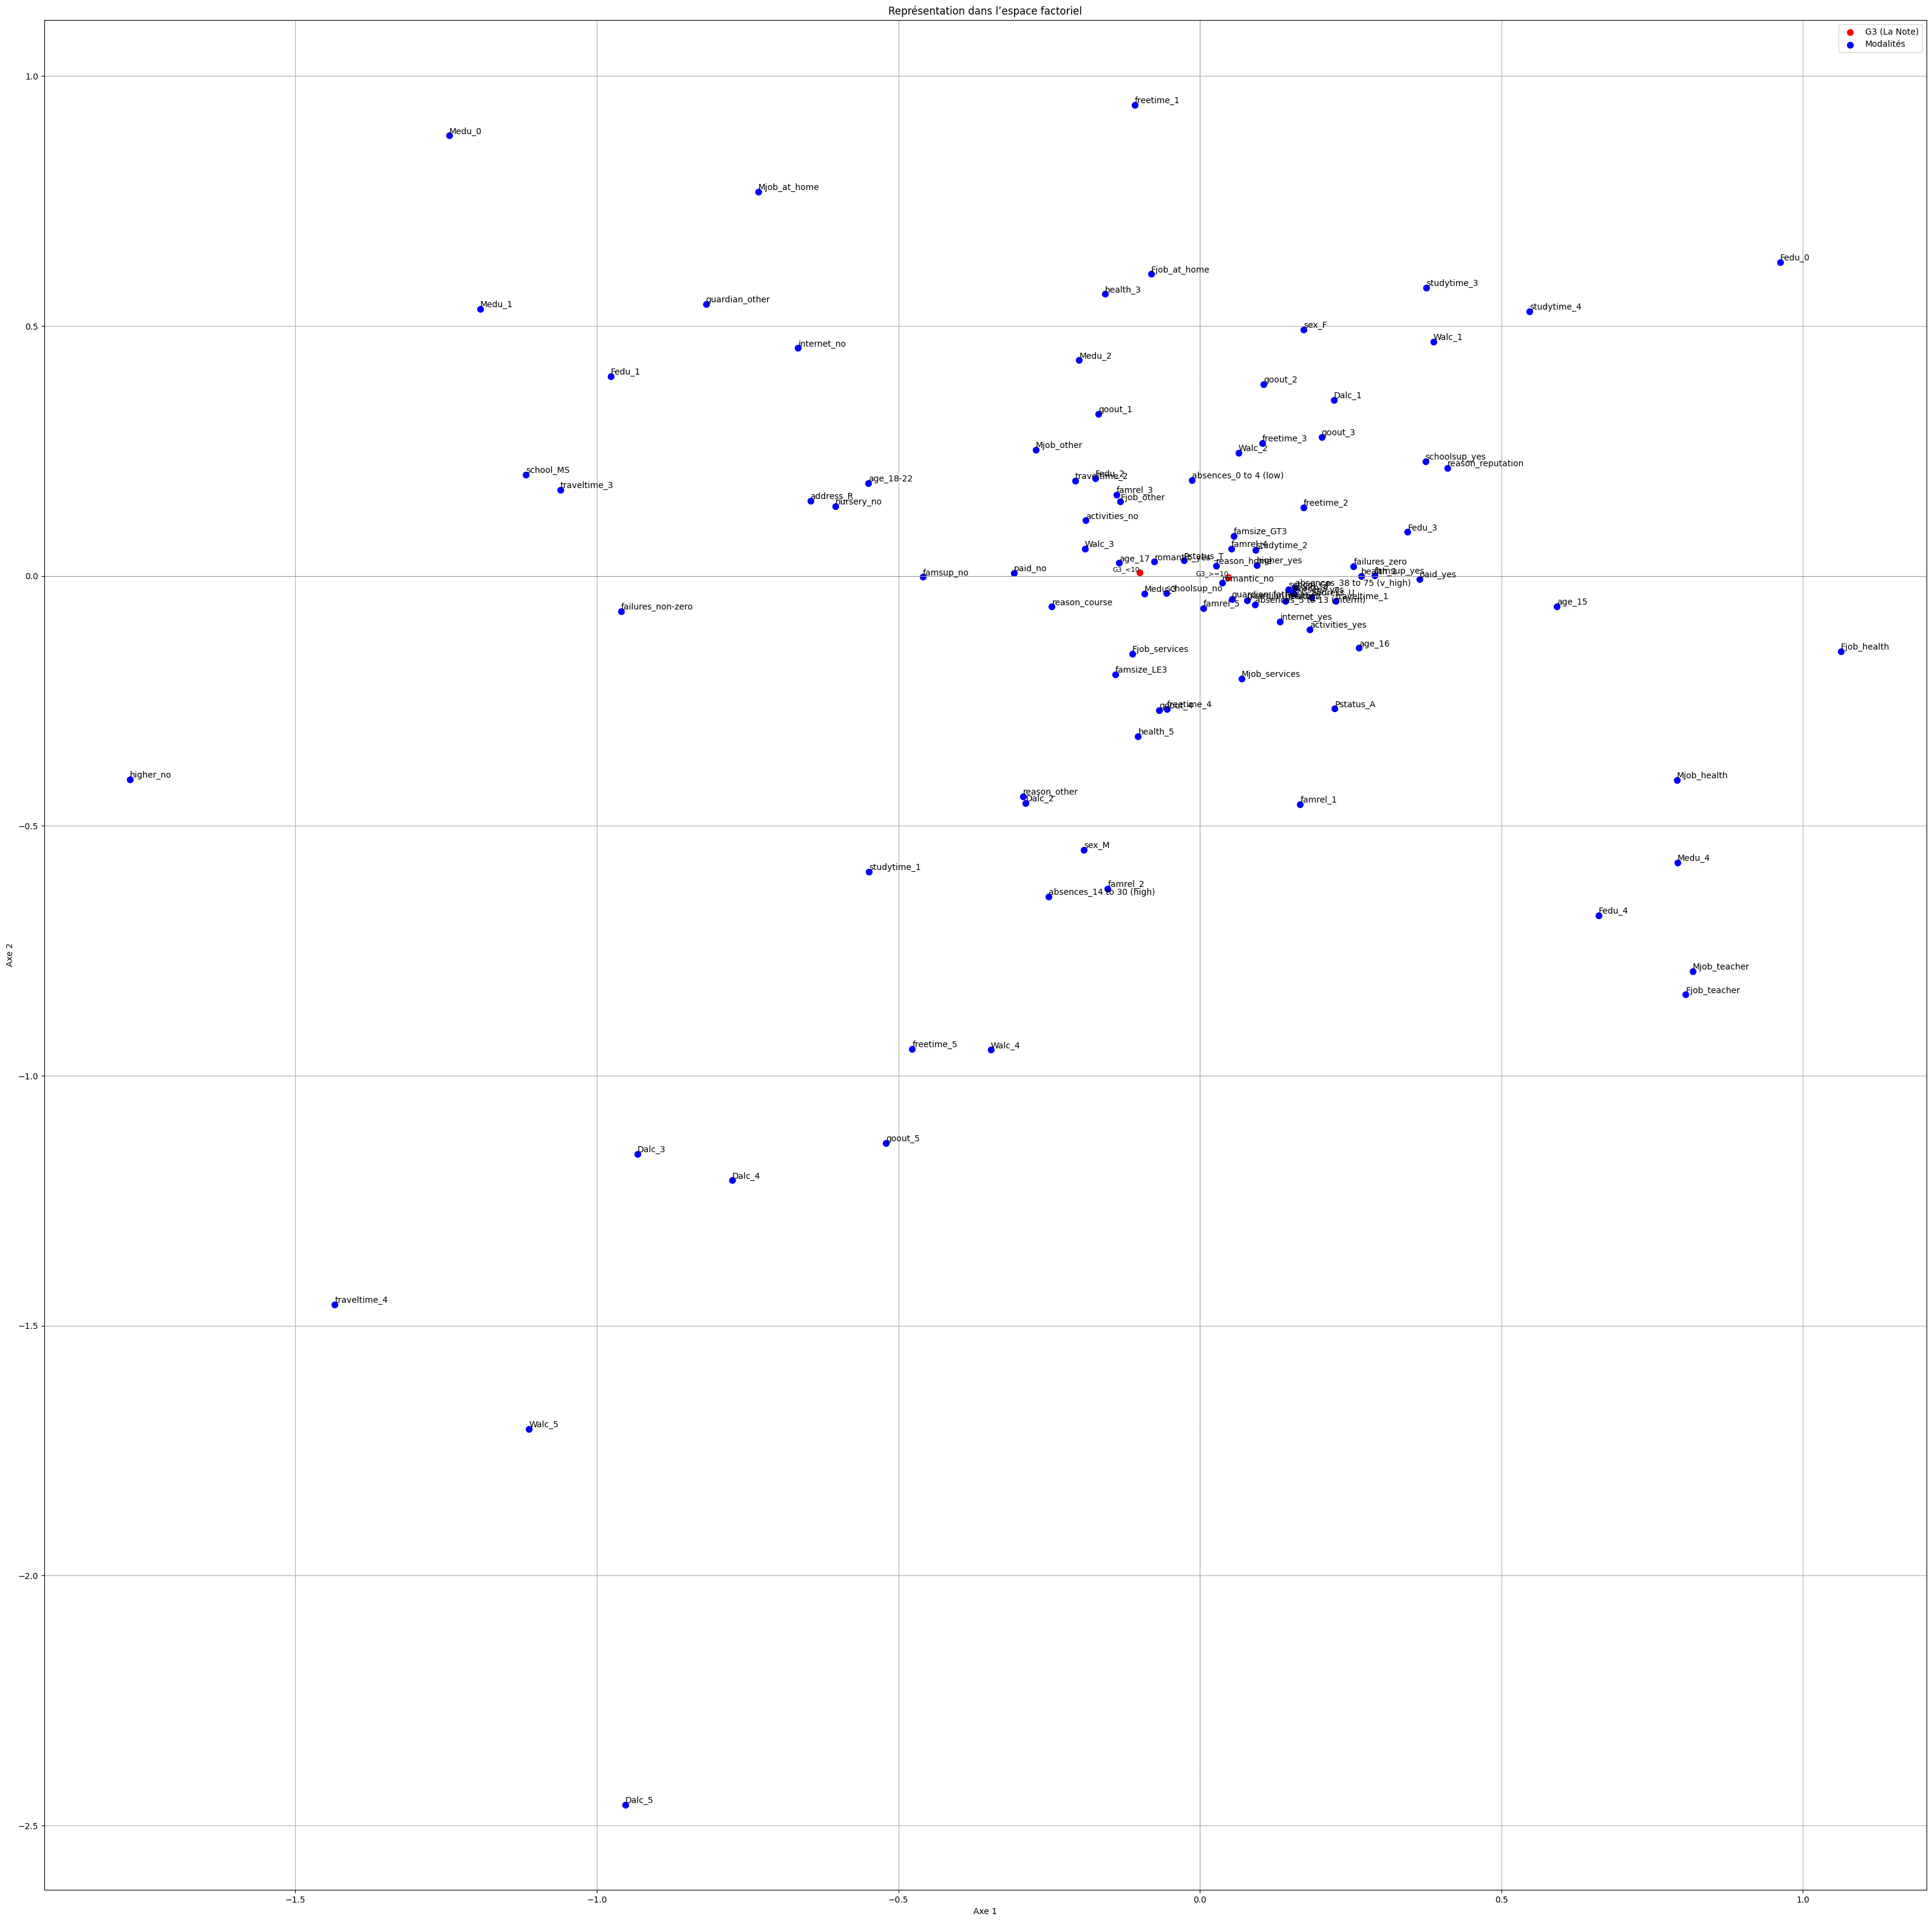

In [435]:
# Extraire les coordonnées des points lignes et colonnes
coord_rows = valeurs_rows.iloc[:, :2].to_numpy()  # Coordonnées des points lignes
coord_cols = valeurs_col.iloc[:, :2].to_numpy()  # Coordonnées des points colonnes
coord_pts_supp = coords[:, :2]  # Coordonnées des points supplémentaires

# Récupérer les labels des points lignes, colonnes et points supplémentaires
labels_rows = valeurs_rows.index  # Noms des races de chiens
labels_cols = valeurs_col.index   # Noms des colonnes (ex : taille_1, taille_2, ...)
labels_pts_supp = burt.T.index  # Labels des points supplémentaires

# Créer le graphique
plt.figure(figsize=(40, 40))

# Tracer les points supplémentaires en cyan
plt.scatter(coords[:, 0], coords[:, 1], color='red', label='G3 (La Note)', s=50)
for i, label in enumerate(labels_pts_supp):
    #Fixed: Ensured that i does not exceed the bounds of coords
    if i < coords.shape[0]:
        plt.text(coords[i, 0],coords[i, 1], label, fontsize=8, ha='right', va='bottom')


# Tracer les points colonnes (caractéristiques) en bleu
plt.scatter(coord_cols[:, 0], coord_cols[:, 1], color='blue', label='Modalités', s=50)
for i, label in enumerate(labels_cols):
    plt.text(coord_cols[i, 0], coord_cols[i, 1], label, fontsize=10, ha='left', va='bottom')

# Ajouter les éléments du graphique
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title('Représentation dans l’espace factoriel')
plt.xlabel('Axe 1')
plt.ylabel('Axe 2')
plt.legend()
plt.grid(True)
# Save plot
plt.savefig("plot_MCA_w_label.png")  # Save as PNG
plt.show()


## ACM en retirant les variables internes qui 

In [414]:
data_new

school sex    age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F  18-22       U     GT3       A     4     4   at_home   teacher   
1       GP   F     17       U     GT3       T     1     1   at_home     other   
2       GP   F     15       U     LE3       T     1     1   at_home     other   
3       GP   F     15       U     GT3       T     4     2    health  services   
4       GP   F     16       U     GT3       T     3     3     other     other   
..     ...  ..    ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M  18-22       U     LE3       A     2     2  services  services   
391     MS   M     17       U     LE3       T     3     1  services  services   
392     MS   M  18-22       R     GT3       T     1     1     other     other   
393     MS   M  18-22       R     LE3       T     3     2  services     other   
394     MS   M  18-22       U     LE3       T     1     1     other   at_home   

     ... internet romantic  famrel  freetime goout Dalc Walc health  \
0    ...       no       no       4         3     4    1    1      3   
1    ...      yes       no       5         3     3    1    1      3   
2    ...      yes       no       4         3     2    2    3      3   
3    ...      yes      yes       3         2     2    1    1      5   
4    ...       no       no       4         3     2    1    2      5   
..   ...      ...      ...     ...       ...   ...  ...  ...    ...   
390  ...       no       no       5         5     4    4    5      4   
391  ...      yes       no       2         4     5    3    4      2   
392  ...       no       no       5         5     3    3    3      3   
393  ...      yes       no       4         4     1    3    4      5   
394  ...      yes       no       3         2     3    3    3      5   

              absences    G3  
0    5 to 13 (interm)    <10  
1    5 to 13 (interm)    <10  
2    5 to 13 (interm)   >=10  
3         0 to 4 (low)  >=10  
4    5 to 13 (interm)   >=10  
..                 ...   ...  
390  5 to 13 (interm)    <10  
391       0 to 4 (low)  >=10  
392       0 to 4 (low)   <10  
393       0 to 4 (low)  >=10  
394  5 to 13 (interm)    <10  

[395 rows x 31 columns]

In [366]:
# Columns to drop
columns_to_remove = ["health", "studytime", "Fjob", "famrel", "sex", "Walc", "internet", 
                     "famsup", "address", "traveltime", "Pstatus", "famsize", "school", 
                     "activities", "nursery"]

# Drop columns

data_new_2 = data_new.drop(columns=columns_to_remove)
data_encoded_2 = pd.get_dummies(data_new_2, columns=data_new_2.columns).astype(int)


In [415]:
##essayer de garder les 10 variables

# List of top 10 variables + target (G3)
top_10_variables = ["failures", "goout", "age", "absences", 
                    "higher", "Fedu", "Medu", "Dalc", "guardian", "Mjob", "G3"]  # Keep target column

# Select only these columns
data_new_2= data_new[top_10_variables]
data_encoded_2 = pd.get_dummies(data_new_2, columns=data_new_2.columns).astype(int)


In [416]:
data_new_2

failures  goout    age           absences higher  Fedu  Medu  Dalc  \
0        zero      4  18-22  5 to 13 (interm)     yes     4     4     1   
1        zero      3     17  5 to 13 (interm)     yes     1     1     1   
2    non-zero      2     15  5 to 13 (interm)     yes     1     1     2   
3        zero      2     15       0 to 4 (low)    yes     2     4     1   
4        zero      2     16  5 to 13 (interm)     yes     3     3     1   
..        ...    ...    ...                ...    ...   ...   ...   ...   
390  non-zero      4  18-22  5 to 13 (interm)     yes     2     2     4   
391      zero      5     17       0 to 4 (low)    yes     1     3     3   
392  non-zero      3  18-22       0 to 4 (low)    yes     1     1     3   
393      zero      1  18-22       0 to 4 (low)    yes     2     3     3   
394      zero      3  18-22  5 to 13 (interm)     yes     1     1     3   

    guardian      Mjob    G3  
0     mother   at_home   <10  
1     father   at_home   <10  
2     mother   at_home  >=10  
3     mother    health  >=10  
4     father     other  >=10  
..       ...       ...   ...  
390    other  services   <10  
391   mother  services  >=10  
392    other     other   <10  
393   mother  services  >=10  
394   father     other   <10  

[395 rows x 11 columns]

In [417]:
ca_2 = CA(col_labels=data_encoded_2.columns.values)
ca_2.fit(data_encoded_2.values)


CA(col_labels=array(['failures_non-zero', 'failures_zero', 'goout_1', 'goout_2',
       'goout_3', 'goout_4', 'goout_5', 'age_15', 'age_16', 'age_17',
       'age_18-22', 'absences_0 to 4 (low)', 'absences_5 to 13 (interm) ',
       'absences_14 to 75 (high)', 'higher_no', 'higher_yes', 'Fedu_0',
       'Fedu_1', 'Fedu_2', 'Fedu_3', 'Fedu_4', 'Medu_0', 'Medu_1',
       'Medu_2', 'Medu_3', 'Medu_4', 'Dalc_1', 'Dalc_2', 'Dalc_3',
       'Dalc_4', 'Dalc_5', 'guardian_father', 'guardian_mother',
       'guardian_other', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'G3_<10', 'G3_>=10'], dtype=object))

In [418]:
# cos2 des modalités sur les deux premiers axes
col_cos2 = pd.DataFrame(ca_2.col_cos2_[:,:2], columns=['Axe 1', 'Axe 2'], index=data_encoded_2.columns)

# afficher les cos2 supérieurs à 0.25 sur le premier axe
col_cos2_high = col_cos2[col_cos2['Axe 1'] > 0.2]
print("Modalités qui ont les cos2 les plus élevés sur l'axe 1")
print(col_cos2_high)
print('-'*50)

# afficher les cos2 supérieurs à 0.25 sur le deuxième axe
col_cos2_high = col_cos2[col_cos2['Axe 2'] > 0.2]
print("Modalités qui ont les cos2 les plus élevés sur l'axe 2")
print(col_cos2_high)

Modalités qui ont les cos2 les plus élevés sur l'axe 1
                      Axe 1     Axe 2
failures_non-zero  0.406837  0.118107
failures_zero      0.405409  0.117353
Fedu_1             0.293927  0.023905
Fedu_4             0.215960  0.152325
Medu_1             0.223388  0.032258
Medu_4             0.464935  0.205500
Mjob_teacher       0.217855  0.147228
--------------------------------------------------
Modalités qui ont les cos2 les plus élevés sur l'axe 2
                             Axe 1     Axe 2
absences_14 to 75 (high)  0.037028  0.205177
Medu_4                    0.464935  0.205500


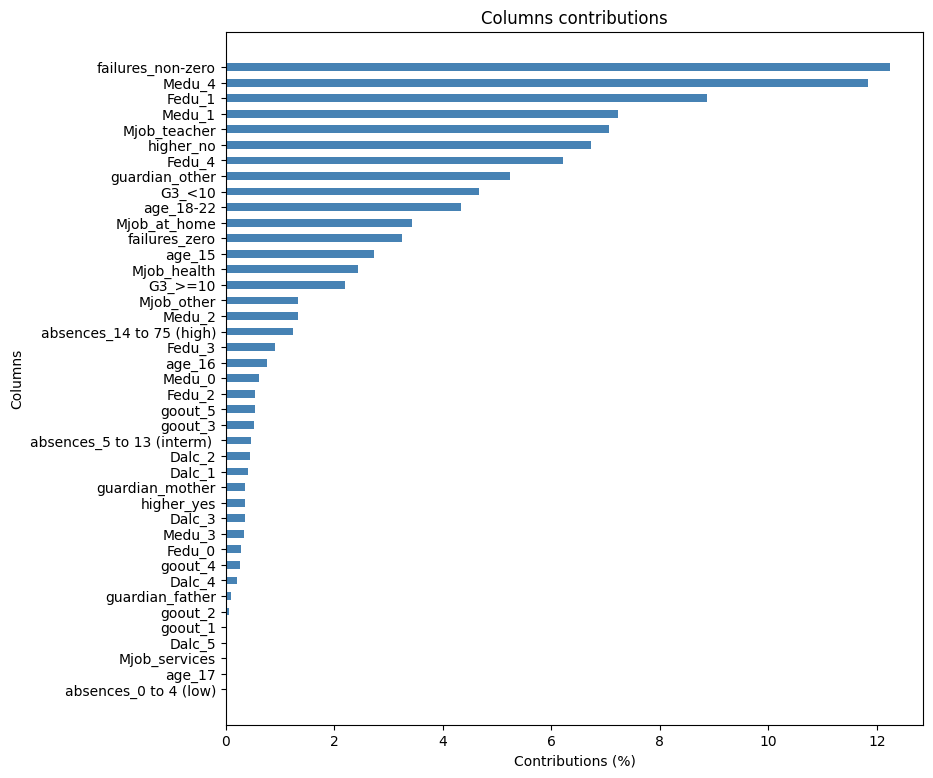

In [419]:
ca_2.plot_col_contrib(num_axis=1, figsize=(9,9))

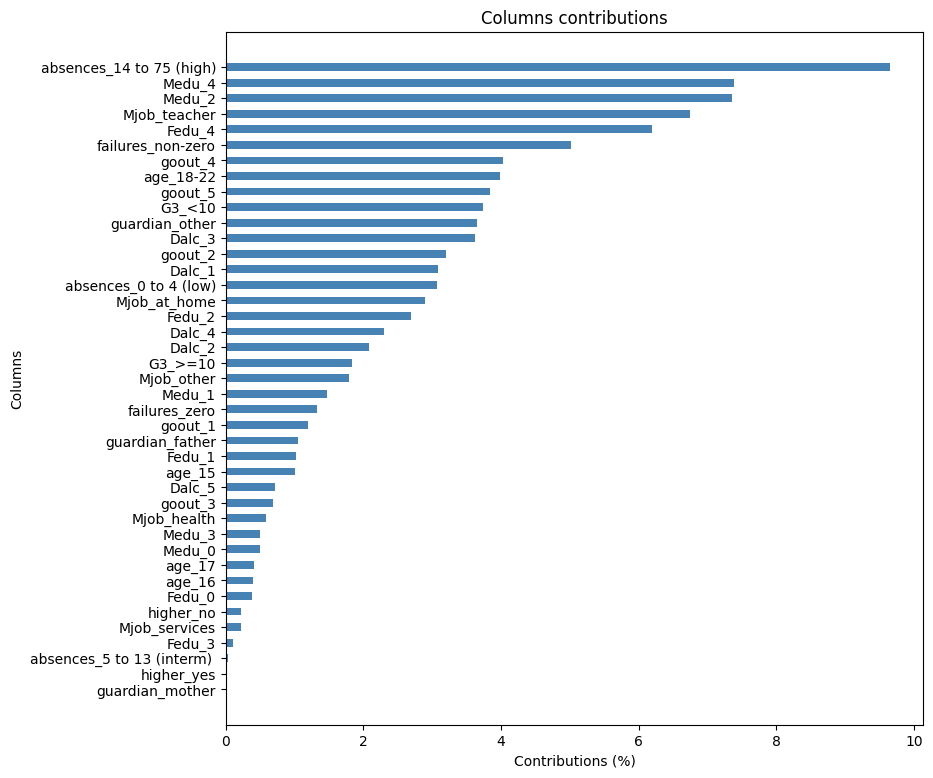

In [420]:
ca_2.plot_col_contrib(num_axis=2, figsize=(9,9))

In [421]:
i=0
for variable in data_encoded_2:
    print(f"Variable : {variable}")
    a = np.sum(data_encoded_2[variable]==1)/(len(data_encoded_2)*15)
    print("Poids", np.round(a,3)*100, "%")
    print("Contribution à l'axe 1", np.round(ca_2.col_contrib_[:, 0][i],2), "%")
    print("Contribution à l'axe 2", np.round(ca_2.col_contrib_[:, 1][i],2), "%")
    if np.round(ca_2.col_contrib_[:, 0][i],2) > np.round(a,3)*100 + 1 or np.round(ca_2.col_contrib_[:, 1][i],2) >= np.round(a,3)*100 + 1:
      # le +1 signifie qu'on considère qu'elle est significative si le poids est plus grand que la contribution d'au moins 1%
      print("Variable significative")
    else:
      print("Variable non significative")
    i+=1
    print("-"*20)

Variable : failures_non-zero
Poids 1.4000000000000001 %
Contribution à l'axe 1 12.24 %
Contribution à l'axe 2 5.02 %
Variable significative
--------------------
Variable : failures_zero
Poids 5.3 %
Contribution à l'axe 1 3.24 %
Contribution à l'axe 2 1.33 %
Variable non significative
--------------------
Variable : goout_1
Poids 0.4 %
Contribution à l'axe 1 0.03 %
Contribution à l'axe 2 1.2 %
Variable non significative
--------------------
Variable : goout_2
Poids 1.7000000000000002 %
Contribution à l'axe 1 0.06 %
Contribution à l'axe 2 3.2 %
Variable significative
--------------------
Variable : goout_3
Poids 2.1999999999999997 %
Contribution à l'axe 1 0.52 %
Contribution à l'axe 2 0.68 %
Variable non significative
--------------------
Variable : goout_4
Poids 1.5 %
Contribution à l'axe 1 0.26 %
Contribution à l'axe 2 4.03 %
Variable significative
--------------------
Variable : goout_5
Poids 0.8999999999999999 %
Contribution à l'axe 1 0.53 %
Contribution à l'axe 2 3.84 %
Variable sig

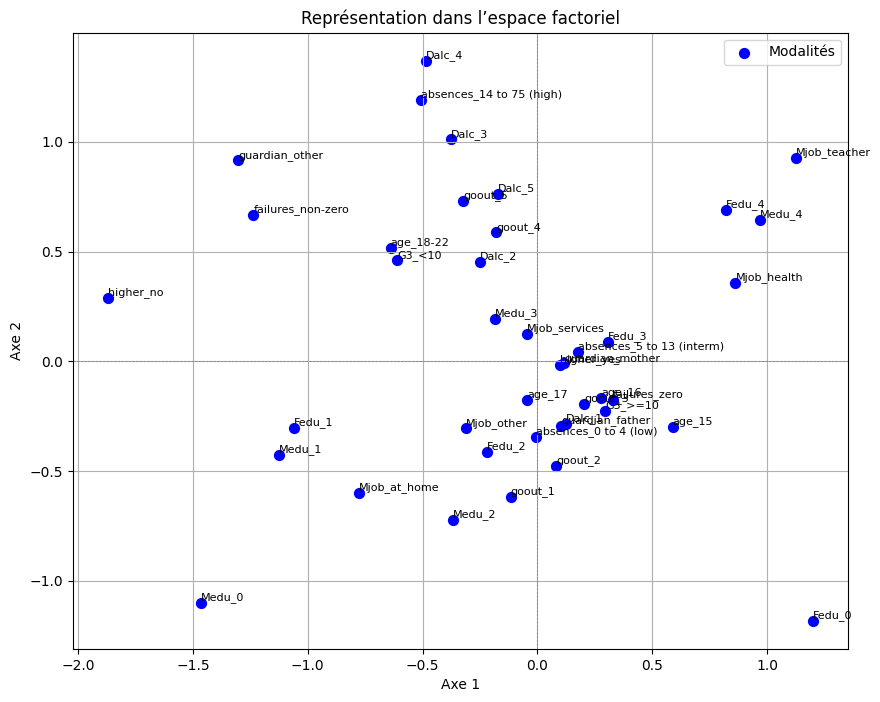

In [422]:
valeurs_rows = ca_2.row_topandas()
valeurs_col = ca_2.col_topandas()

# Extraire les coordonnées des points lignes et colonnes
coord_rows = valeurs_rows.iloc[:, :2].to_numpy()  # Coordonnées des points lignes
coord_cols = valeurs_col.iloc[:, :2].to_numpy()  # Coordonnées des points colonnes

# Récupérer les labels des points lignes, colonnes et points supplémentaires
labels_rows = valeurs_rows.index  # Noms des races de chiens
labels_cols = valeurs_col.index   # Noms des colonnes (ex : taille_1, taille_2, ...)

# Créer le graphique
plt.figure(figsize=(10, 8))


# Tracer les points colonnes (caractéristiques) en bleu
plt.scatter(coord_cols[:, 0], coord_cols[:, 1], color='blue', label='Modalités', s=50)
for i, label in enumerate(labels_cols):
    plt.text(coord_cols[i, 0], coord_cols[i, 1], label, fontsize=8, ha='left', va='bottom')

# Ajouter les éléments du graphique
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title('Représentation dans l’espace factoriel')
plt.xlabel('Axe 1')
plt.ylabel('Axe 2')
plt.legend()
plt.grid(True)
plt.show()

In [423]:
burt2 = data_encoded.iloc[:,-2:].T @ data_encoded_2
burt2

failures_non-zero  failures_zero  goout_1  goout_2  goout_3  goout_4  \
G3_<10                  52             78        6       24       37       38   
G3_>=10                 31            233       17       78       93       48   

         goout_5  age_15  age_16  age_17  ...  guardian_father  \
G3_<10        25      21      27      32  ...               25   
G3_>=10       28      61      76      66  ...               65   

         guardian_mother  guardian_other  Mjob_at_home  Mjob_health  \
G3_<10                89              16            22            7   
G3_>=10              183              16            37           26   

         Mjob_other  Mjob_services  Mjob_teacher  G3_<10  G3_>=10  
G3_<10           53             29            19     130        0  
G3_>=10          88             74            39       0      264  

[2 rows x 41 columns]

In [424]:
coords_cancer2 = ca_2.transform(burt2)
print(coords_cancer2[:, :2])

[[-0.29727979  0.18854298]
 [ 0.14382854 -0.09271382]]


In [425]:
# Calcul des valeurs-test de la variable supplémentaire sur les 2 axes

v_test_1 = coords_cancer2[:, 0][0]*np.sqrt(data_encoded['G3_>=10'].sum())*np.sqrt((len(data_encoded)-1)/(len(data_encoded)-data_encoded['G3_>=10'].sum()))
v_test_2 = coords_cancer2[:, 0][1]*np.sqrt(data_encoded['G3_<10'].sum())*np.sqrt((len(data_encoded)-1)/(len(data_encoded)-data_encoded['G3_<10'].sum()))
print('Calcul des valeurs-test de la variable supplémentaire:\n')
print(f"La valeur test de la modalité G3_>=10 sur l'axe 1 est {np.round(v_test_1,2)}")
print(f"La valeur test de la modalité G3_<10 sur l'axe 1 est {np.round(v_test_2,2)}")
print('-'*50)
test_1 = coords_cancer2[:, 1][0]*np.sqrt(data_encoded['G3_>=10'].sum())*np.sqrt((len(data_encoded)-1)/(len(data_encoded)-data_encoded['G3_>=10'].sum()))
v_test_2 = coords_cancer2[:, 1][1]*np.sqrt(data_encoded['G3_<10'].sum())*np.sqrt((len(data_encoded)-1)/(len(data_encoded)-data_encoded['G3_<10'].sum()))

print(f"La valeur test de la modalité G3_>=10 sur l'axe 2 est {np.round(v_test_1,2)}")
print(f"La valeur test de la modalité G3_<10 sur l'axe 2 est {np.round(v_test_2,2)}")

Calcul des valeurs-test de la variable supplémentaire:

La valeur test de la modalité G3_>=10 sur l'axe 1 est -8.38
La valeur test de la modalité G3_<10 sur l'axe 1 est 2.0
--------------------------------------------------
La valeur test de la modalité G3_>=10 sur l'axe 2 est -8.38
La valeur test de la modalité G3_<10 sur l'axe 2 est -1.29


In [427]:
valeurs_rows = ca_2.row_topandas()
valeurs_col = ca_2.col_topandas()
coords = coords_cancer2

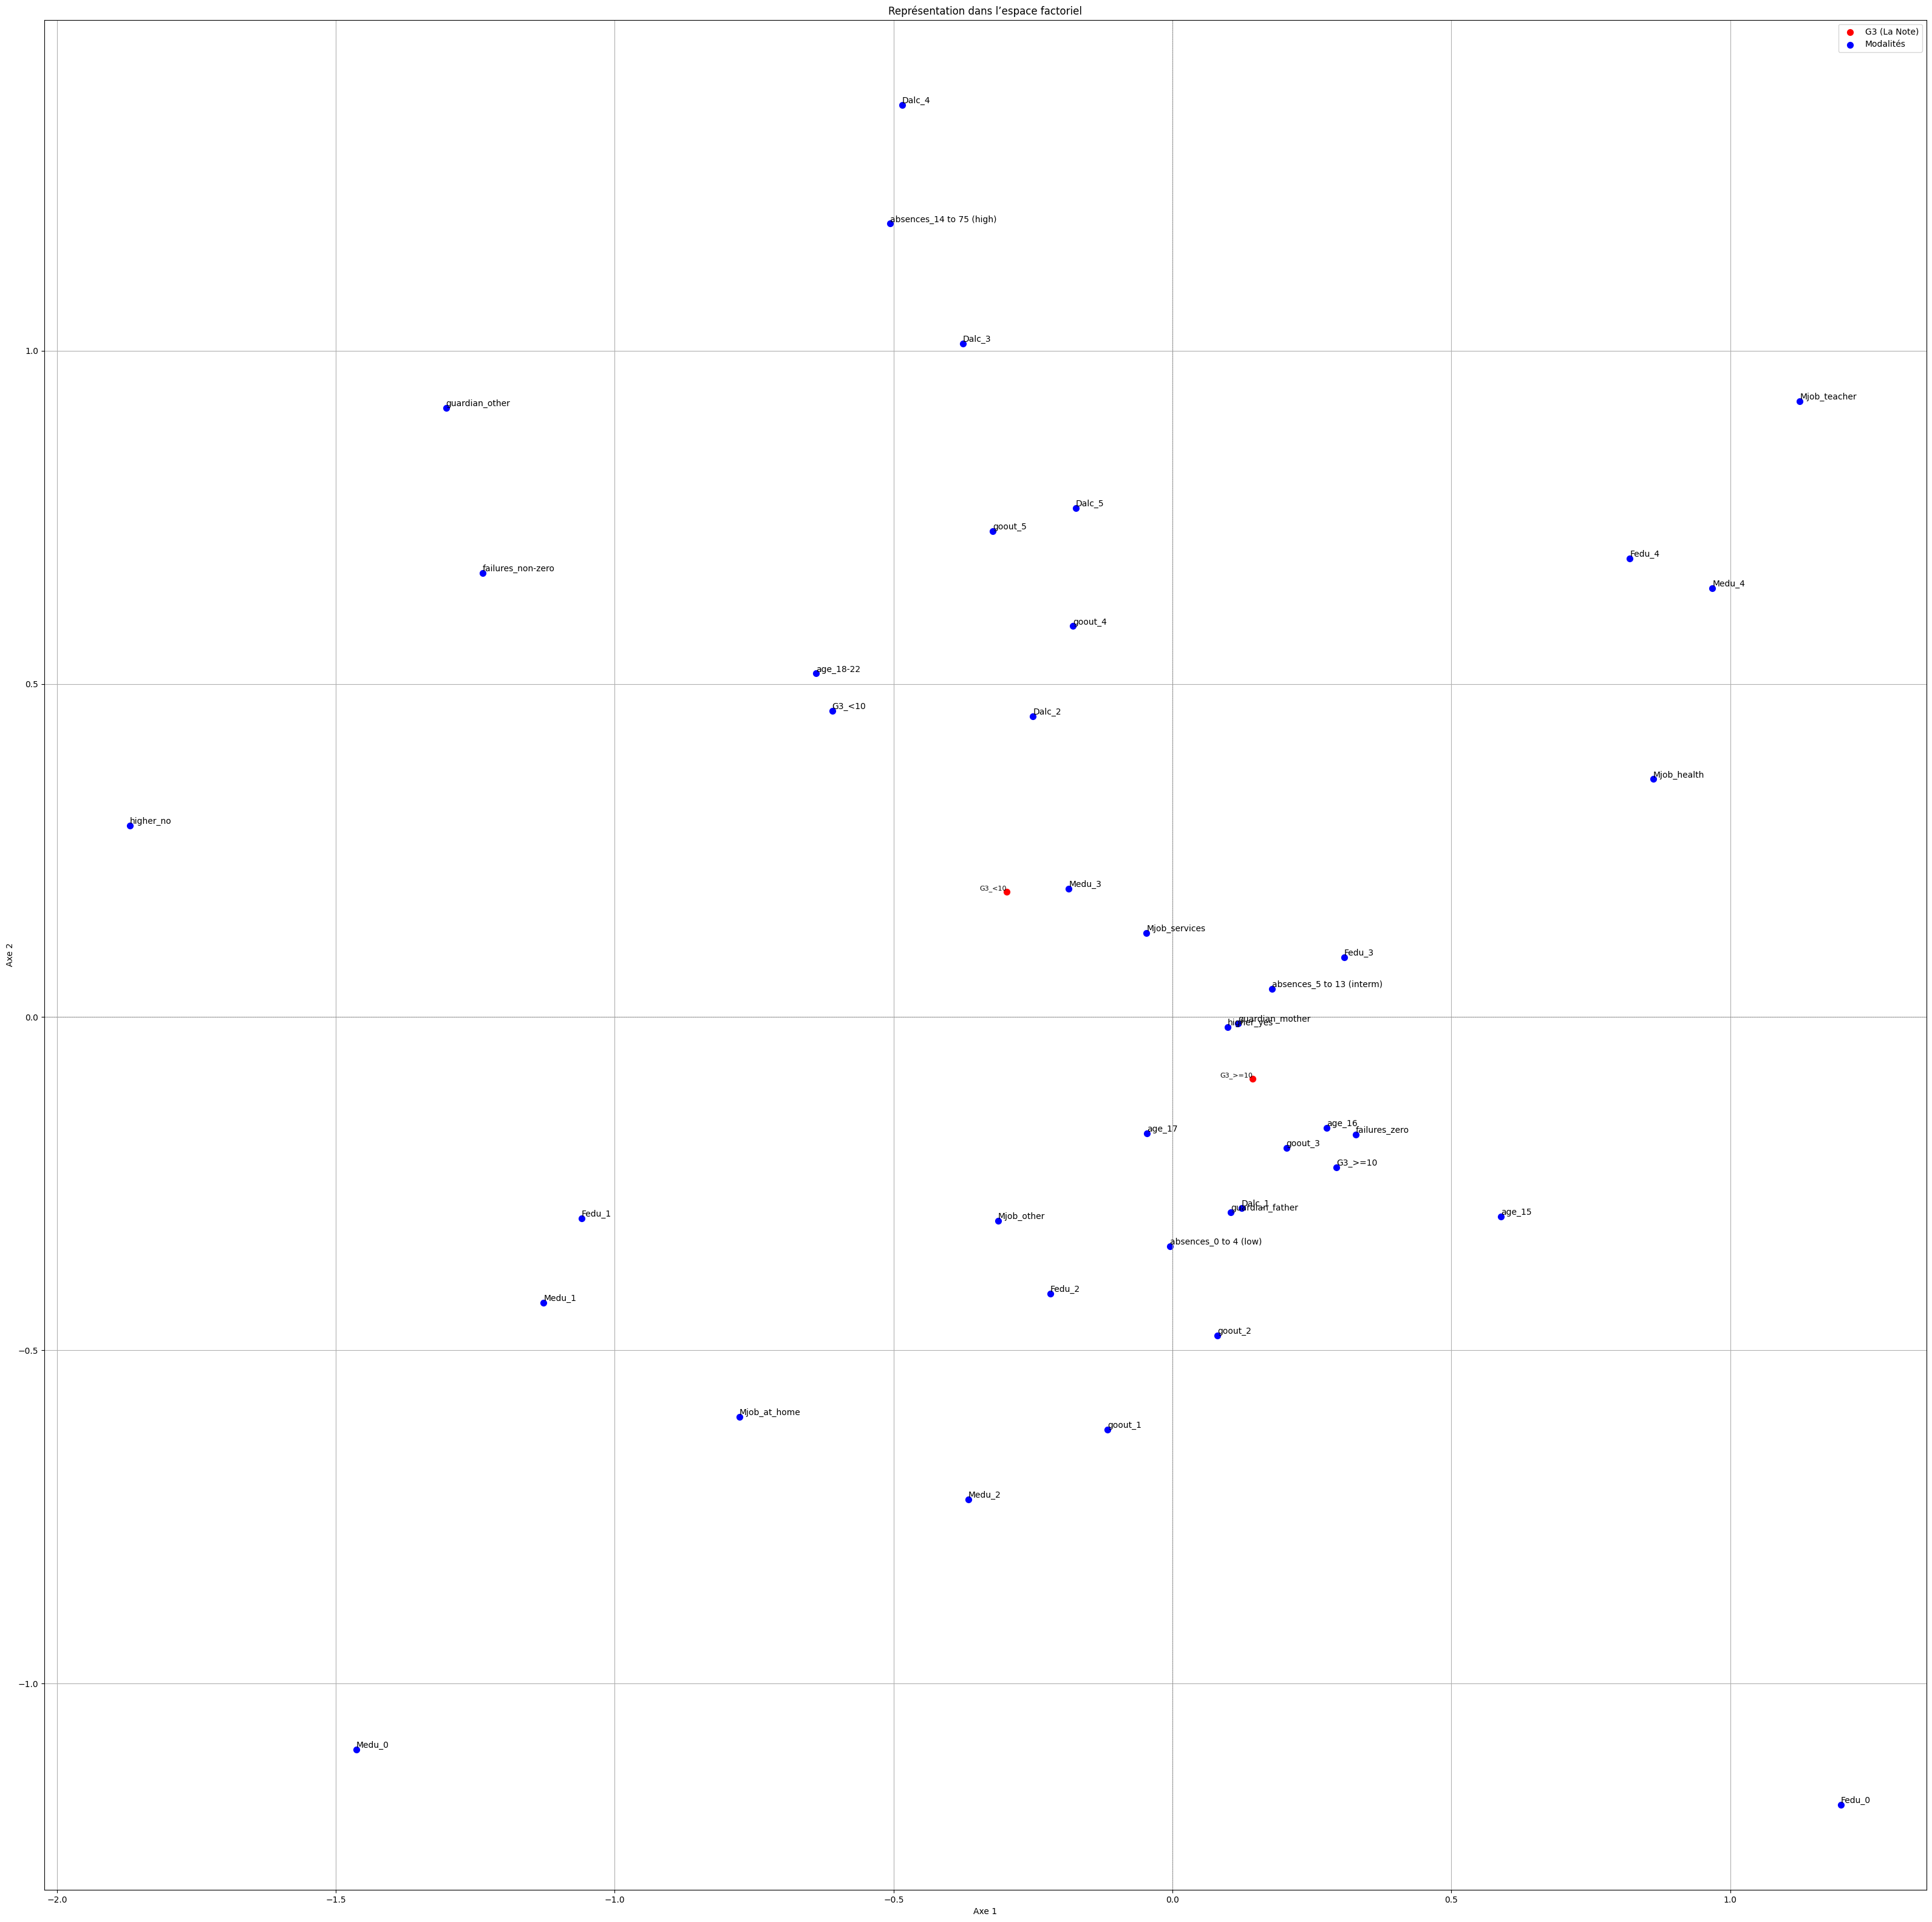

In [429]:
# Extraire les coordonnées des points lignes et colonnes
coord_rows = valeurs_rows.iloc[:, :2].to_numpy()  # Coordonnées des points lignes
coord_cols = valeurs_col.iloc[:, :2].to_numpy()  # Coordonnées des points colonnes
coord_pts_supp = coords[:, :2]  # Coordonnées des points supplémentaires

# Récupérer les labels des points lignes, colonnes et points supplémentaires
labels_rows = valeurs_rows.index  # Noms des races de chiens
labels_cols = valeurs_col.index   # Noms des colonnes (ex : taille_1, taille_2, ...)
labels_pts_supp = burt.T.index  # Labels des points supplémentaires

# Créer le graphique
plt.figure(figsize=(40, 40))

# Tracer les points supplémentaires en cyan
plt.scatter(coords[:, 0], coords[:, 1], color='red', label='G3 (La Note)', s=50)
for i, label in enumerate(labels_pts_supp):
    #Fixed: Ensured that i does not exceed the bounds of coords
    if i < coords.shape[0]:
        plt.text(coords[i, 0],coords[i, 1], label, fontsize=8, ha='right', va='bottom')


# Tracer les points colonnes (caractéristiques) en bleu
plt.scatter(coord_cols[:, 0], coord_cols[:, 1], color='blue', label='Modalités', s=50)
for i, label in enumerate(labels_cols):
    plt.text(coord_cols[i, 0], coord_cols[i, 1], label, fontsize=10, ha='left', va='bottom')

# Ajouter les éléments du graphique
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title('Représentation dans l’espace factoriel')
plt.xlabel('Axe 1')
plt.ylabel('Axe 2')
plt.legend()
plt.grid(True)
# Save plot
plt.savefig("plot_MCA_2_w_label.png")  # Save as PNG
plt.show()


In [97]:
# G3_0 to 0	 G3_4 to 9	G3_10 to 13	G3_14 to 20

## CAH

In [443]:
coords = ca.row_coord_
coords.shape
coord_individus = coords

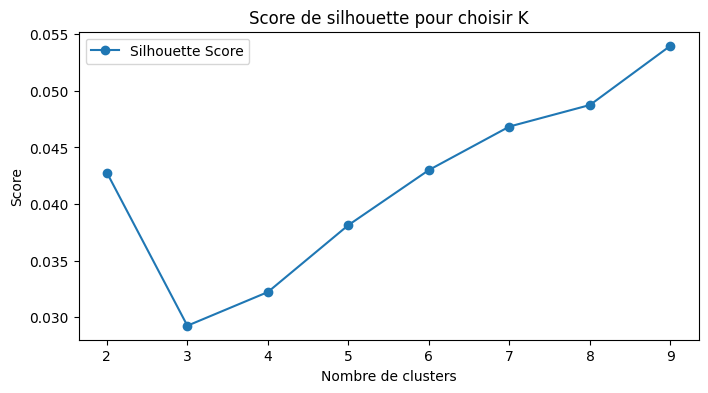

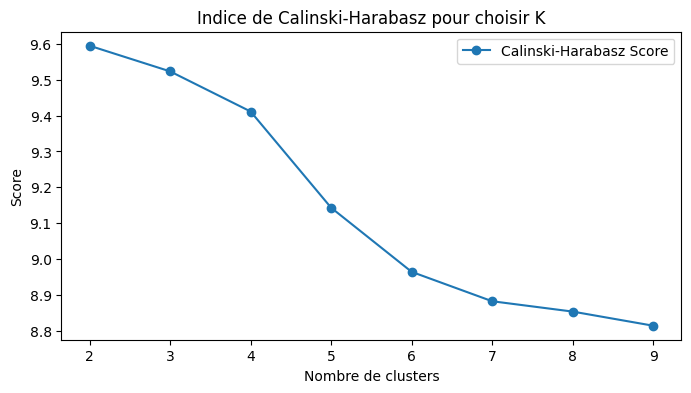

In [438]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering

X = coord_individus [:,:50] 

silhouette_scores = []
ch_scores = []
k_range = range(2, 10)  # Tester de 2 à 10 clusters

for k in k_range:
    cah = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = cah.fit_predict(X)
    
    sil_score = silhouette_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)
    
    silhouette_scores.append(sil_score)
    ch_scores.append(ch_score)

# Tracer le score de silhouette
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o', label="Silhouette Score")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score")
plt.legend()
plt.title("Score de silhouette pour choisir K")
plt.show()

# Tracer l'indice de Calinski-Harabasz
plt.figure(figsize=(8, 4))
plt.plot(k_range, ch_scores, marker='o', label="Calinski-Harabasz Score")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score")
plt.legend()
plt.title("Indice de Calinski-Harabasz pour choisir K")
plt.show()


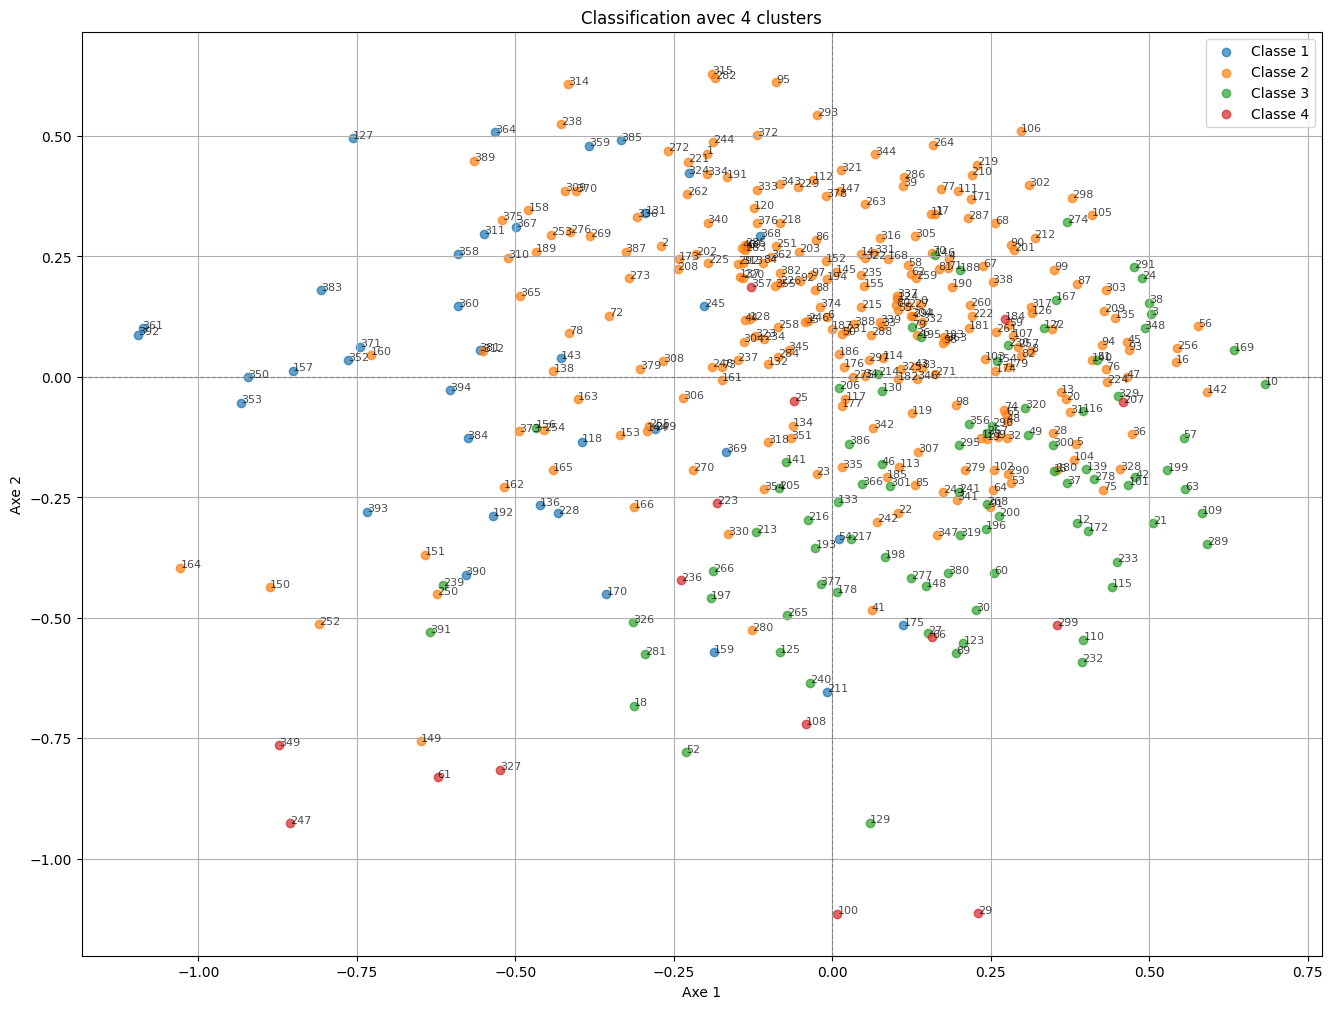

In [441]:
classes = 4  # Demande à l'utilisateur

# Appliquer la CAH avec le nombre de clusters choisi
cah = AgglomerativeClustering(n_clusters=classes, linkage='ward')
labels = cah.fit_predict(X)

# Affichage des clusters
plt.figure(figsize=(16, 12))
for i in range(classes):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f"Classe {i+1}", alpha=0.7) 

for i, txt in enumerate(df_bin.index):
    plt.annotate(txt, (X[i, 0], X[i, 1]), fontsize=8, alpha=0.7)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)

plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.title(f"Classification avec {classes} clusters")
plt.legend()
plt.grid()
plt.show()


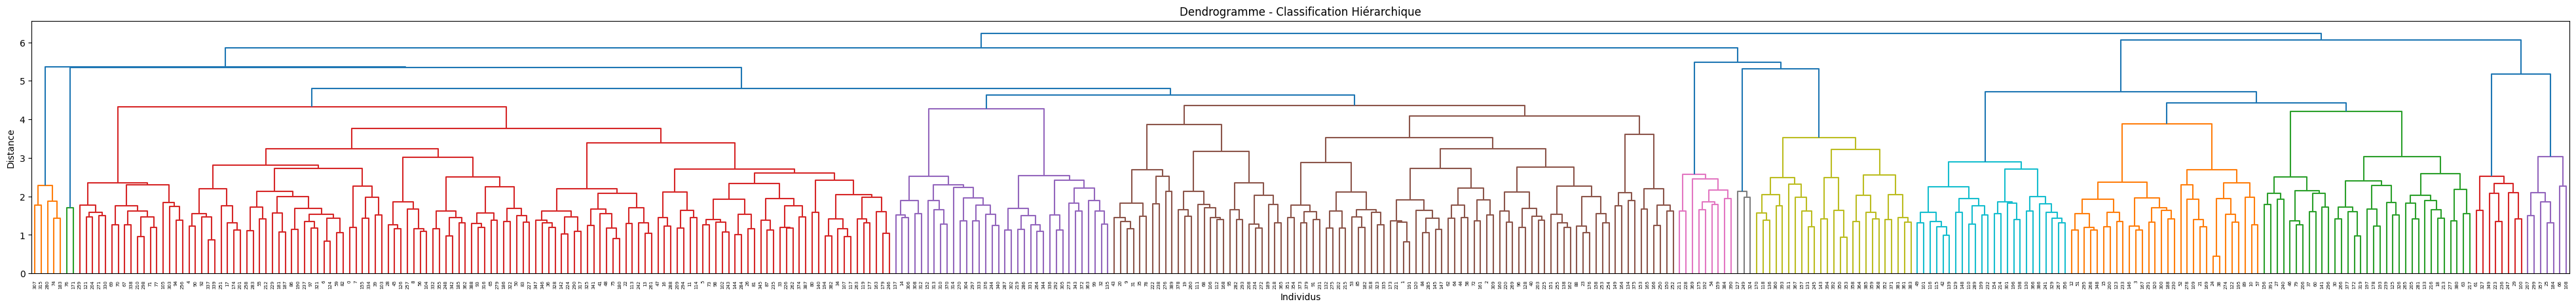

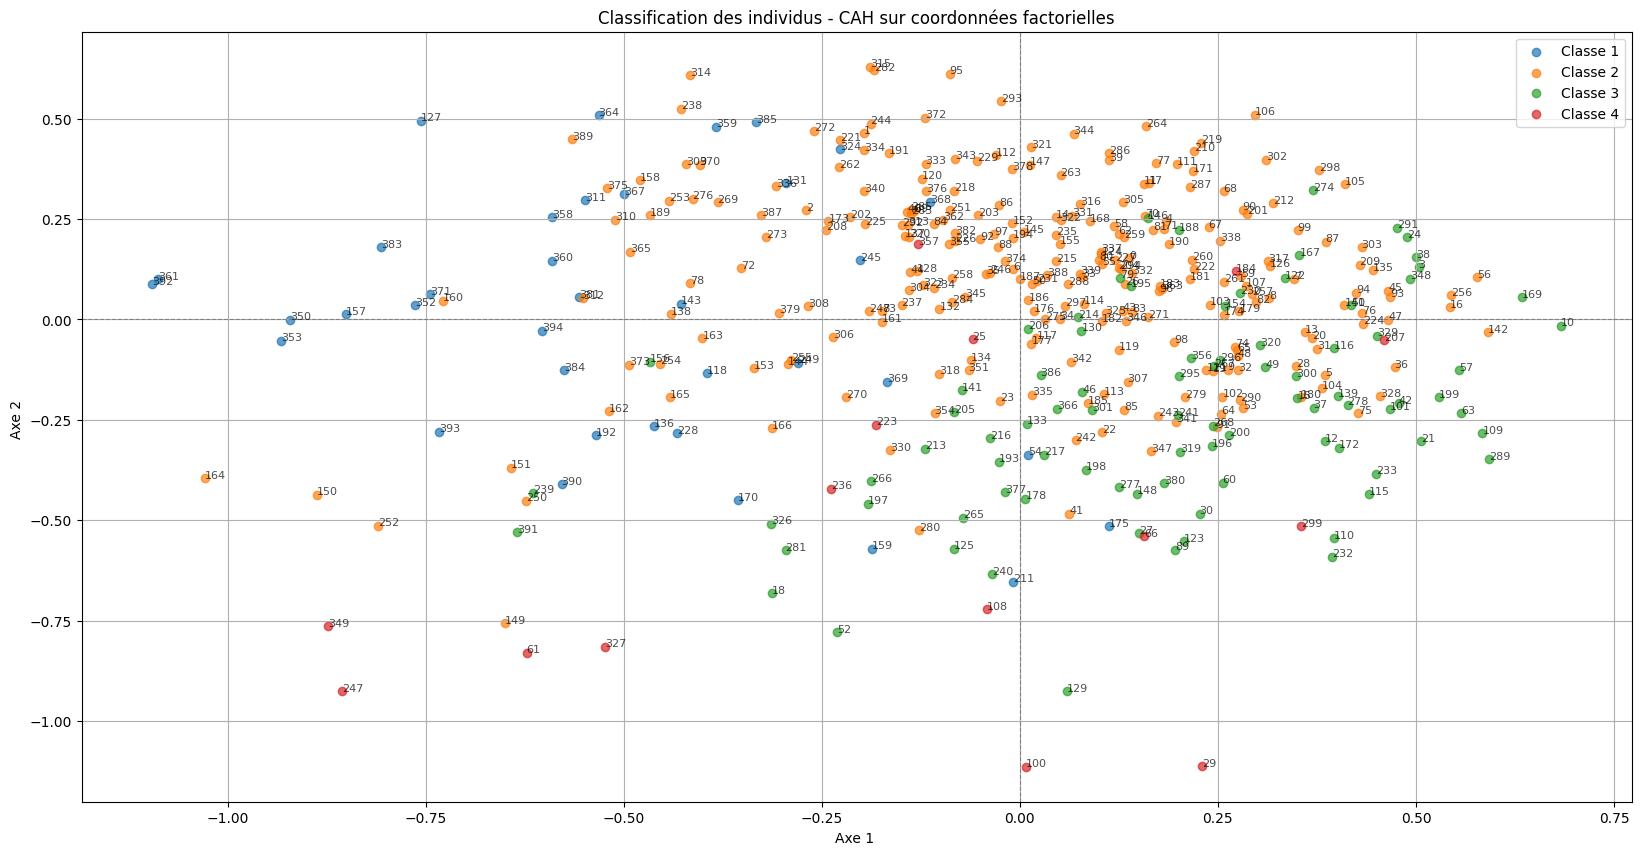

In [440]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt

classes = 4



plt.figure(figsize=(50, 5))
linked = sch.linkage(pdist(X, metric='euclidean'), method='ward')
dendrogram = sch.dendrogram(linked)
plt.axhline(y=200, color='r', linestyle='--')  # Ajuste la valeur en fonction du graphique
plt.title("Dendrogramme - Classification Hiérarchique")
plt.xlabel("Individus")
plt.ylabel("Distance")
plt.show()


# 3. Appliquer la CAH pour segmenter en 3 classes
cah = AgglomerativeClustering(n_clusters=classes, linkage='ward')
labels = cah.fit_predict(X)

# 4. Visualisation des classes sur le plan factoriel
plt.figure(figsize=(20, 10))
for i in range(classes):  # Affichage des 3 classes
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f"Classe {i+1}", alpha=0.7)

# Ajout des axes en gris
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)

# Ajout des labels des individus
for i, txt in enumerate(df_bin.index):
    plt.annotate(txt, (X[i, 0], X[i, 1]), fontsize=8, alpha=0.7)

plt.xlabel(f"Axe 1 ")
plt.ylabel(f"Axe 2 ")
plt.title("Classification des individus - CAH sur coordonnées factorielles")
plt.legend()
plt.grid()
plt.show()


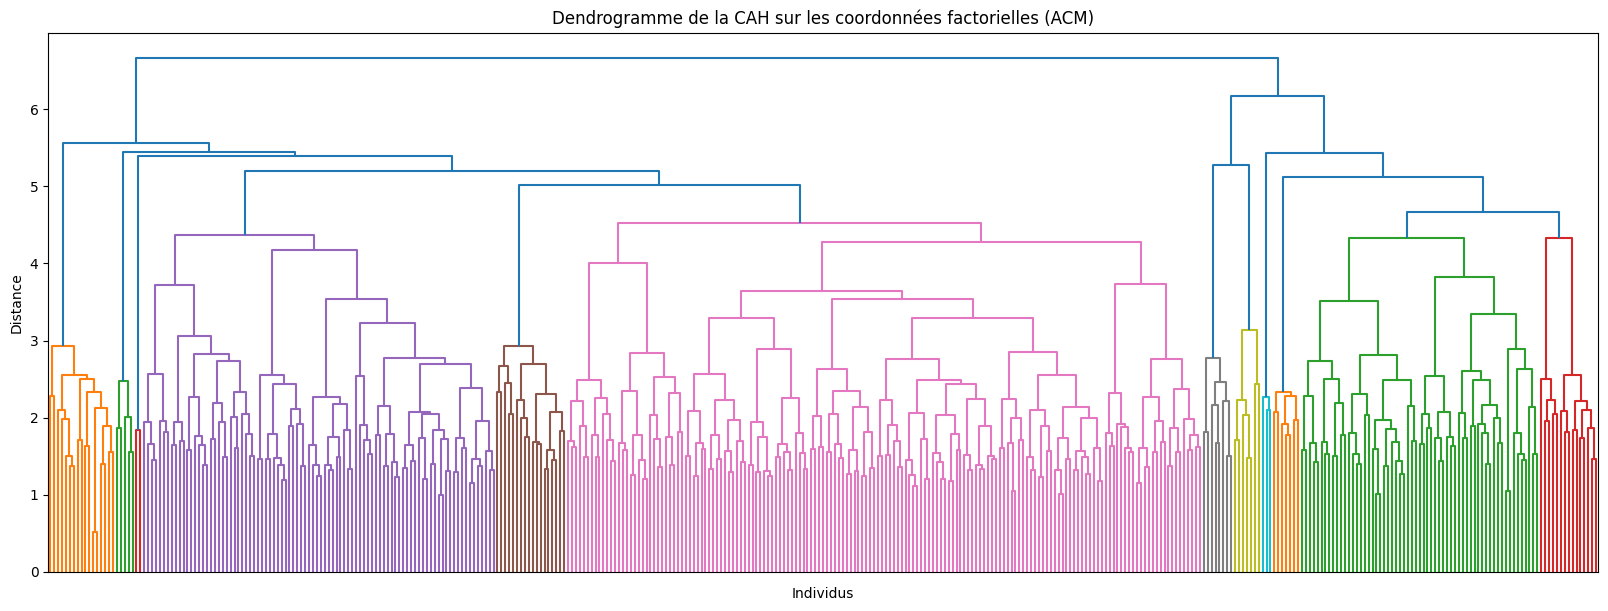

In [447]:
# Effectuer la CAH sur les coordonnées factorielles
Z = linkage(coords, method='ward')

plt.figure(figsize=(20, 7))
dendrogram(Z)
plt.title('Dendrogramme de la CAH sur les coordonnées factorielles (ACM)')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.xticks(np.arange(0, len(coords), 10), rotation=90)
plt.show()

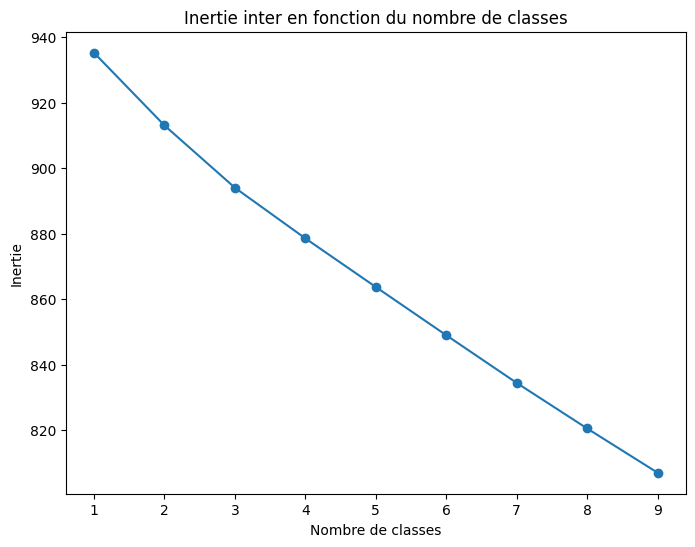

In [449]:
# Tracer la perte d'inertie inter
from scipy.cluster.hierarchy import fcluster

inertia = []
for i in range(1, 10):
    cluster_labels = fcluster(Z, t=i, criterion='maxclust')
    centroids = []
    for j in range(1, i + 1):
        cluster_points = coords[cluster_labels == j]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)

    total_inertia = 0
    for j in range(len(coords)):
        cluster_id = cluster_labels[j]
        total_inertia += np.sum((coords[j] - centroids[cluster_id - 1]) ** 2)

    inertia.append(total_inertia)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Inertie inter en fonction du nombre de classes')
plt.xlabel('Nombre de classes')
plt.ylabel('Inertie')
plt.xticks(np.arange(1,10))
plt.show()

In [463]:
# Classification en 4 classes
from scipy.cluster.hierarchy import fcluster
cluster_labels = fcluster(Z, t=4, criterion='maxclust')

In [464]:
data_encoded['cluster'] = cluster_labels
data_new['cluster'] = cluster_labels

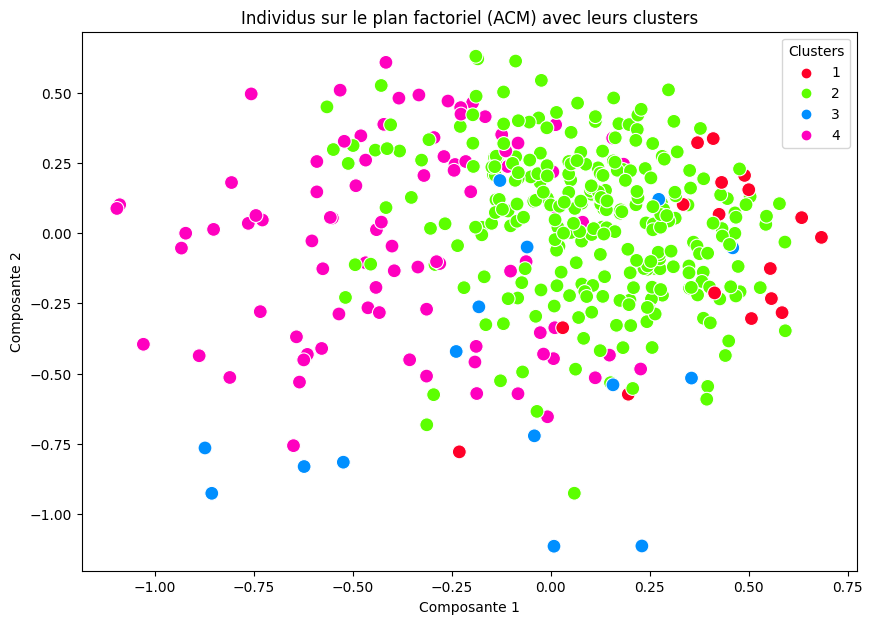

In [465]:
# Visualisation des individus sur le plan factoriel
plt.figure(figsize=(10, 7))

sns.scatterplot(x=coords[:,0], y=coords[:,1], hue=data_encoded['cluster'], palette='gist_rainbow', s=100, marker='o')

plt.title('Individus sur le plan factoriel (ACM) avec leurs clusters')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.legend(title='Clusters')
plt.show()

In [466]:
data_encoded["cluster"].value_counts()

cluster
2    277
4     86
1     17
3     15
Name: count, dtype: int64

In [467]:
data_new.head()

school sex    age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F  18-22       U     GT3       A     4     4  at_home   teacher   
1     GP   F     17       U     GT3       T     1     1  at_home     other   
2     GP   F     15       U     LE3       T     1     1  at_home     other   
3     GP   F     15       U     GT3       T     4     2   health  services   
4     GP   F     16       U     GT3       T     3     3    other     other   

   ... romantic famrel  freetime  goout Dalc Walc health           absences  \
0  ...       no      4         3      4    1    1      3  5 to 13 (interm)    
1  ...       no      5         3      3    1    1      3  5 to 13 (interm)    
2  ...       no      4         3      2    2    3      3  5 to 13 (interm)    
3  ...      yes      3         2      2    1    1      5       0 to 4 (low)   
4  ...       no      4         3      2    1    2      5  5 to 13 (interm)    

     G3 cluster  
0   <10       2  
1   <10       4  
2  >=10       4  
3  >=10       2  
4  >=10       4  

[5 rows x 32 columns]

   cluster    G3  count
0        1   <10      6
1        1  >=10     11
2        2   <10     87
3        2  >=10    189
4        3   <10      3
5        3  >=10     12
6        4   <10     34
7        4  >=10     52




/var/folders/bc/fnnwn98102z465mh8434jsvc0000gn/T/ipykernel_97280/3193253438.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = data_new.groupby(['cluster', 'G3'])['G3'].count().reset_index(name='count')


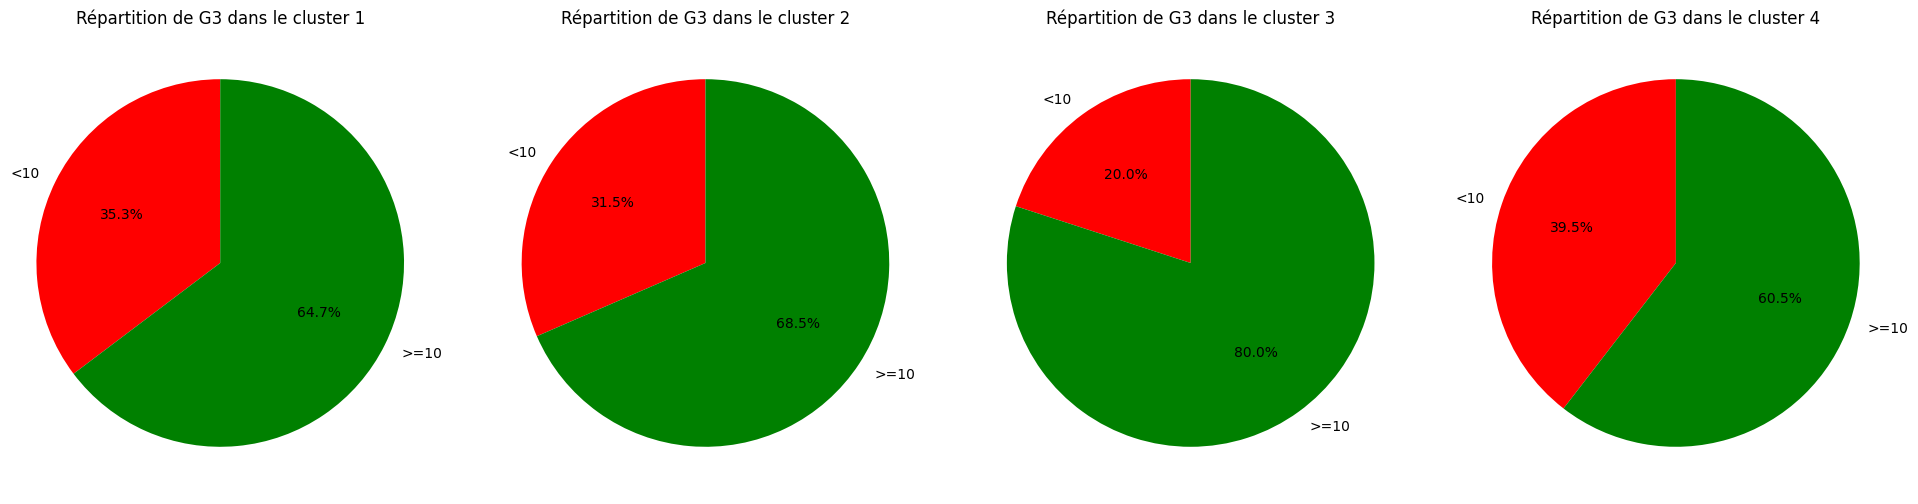

In [471]:
#Compter le nombre de cancer et de non cancer dans chaque cluster
cluster_counts = data_new.groupby(['cluster', 'G3'])['G3'].count().reset_index(name='count')
print(cluster_counts)
print('\n')
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

for cluster in range(1, 5):
    cluster_data = cluster_counts[cluster_counts['cluster'] == cluster]
    labels = cluster_data['G3']
    sizes = cluster_data['count']
    color_dict = {'>=10': 'green', '<10': 'red'}
    colors = [color_dict[label] for label in labels]

    axes[cluster - 1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[cluster - 1].set_title(f'Répartition de G3 dans le cluster {cluster}')
    axes[cluster - 1].axis('equal')

plt.show()

## Kmeans

In [276]:
from sklearn.cluster import KMeans

coords = ca.row_coord_
coords.shape

k=4

# Appliquer K-Means
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
kmeans.fit(coords)
kmeans_labels = kmeans.labels_

In [277]:
data_new['cluster_kmeans'] = kmeans_labels

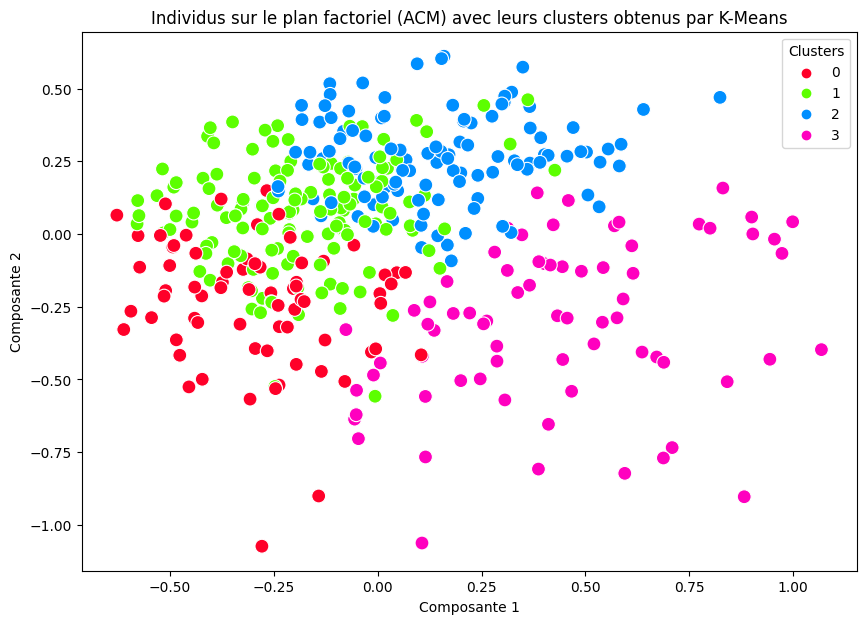

In [278]:
# Visualisation des individus sur le plan factoriel
plt.figure(figsize=(10, 7))

sns.scatterplot(x=coords[:,0], y=coords[:,1], hue=data_new['cluster_kmeans'], palette='gist_rainbow', s=100, marker='o')

plt.title('Individus sur le plan factoriel (ACM) avec leurs clusters obtenus par K-Means')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.legend(title='Clusters')
plt.show()

In [279]:
data_new["cluster_kmeans"].value_counts()

cluster_kmeans
1    138
2    112
0     73
3     72
Name: count, dtype: int64

## Analyse discriminante

In [480]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [481]:
#lineardiscriminant analysis
lda = LinearDiscriminantAnalysis()

In [474]:
# Step 1: Select the last 4 columns (one-hot encoded labels)
y_ohe = data_encoded.iloc[:, -2:]

# Step 2: Convert one-hot encoding back to a single categorical column
y = y_ohe.idxmax(axis=1)  # This gives back the column name as the class label

In [475]:
y_ohe

G3_>=10  cluster
0          0        2
1          0        4
2          1        4
3          1        2
4          1        4
..       ...      ...
390        0        4
391        1        4
392        0        4
393        1        4
394        0        4

[395 rows x 2 columns]

In [476]:
y

0      cluster
1      cluster
2      cluster
3      cluster
4      cluster
        ...   
390    cluster
391    cluster
392    cluster
393    cluster
394    cluster
Length: 395, dtype: object

In [477]:
# Step 1: Select the last 4 columns (one-hot encoded labels)
y_ohe = data_encoded.iloc[:, -4:]

# Step 2: Convert one-hot encoding back to a single column (get class names)
y_categorical = y_ohe.idxmax(axis=1)  # Gets column name with the 1

# Debug: Print unique values in y_categorical to check column names
print("Unique class names in y_categorical:", y_categorical.unique())

class_mapping = {
    'G3_0 to 0': 0,
    'G3_4 to 9': 1,
    'G3_10 to 13': 2,
    'G3_14 to 20': 3
}

# Apply the correct mapping
y = y_categorical.map(class_mapping)

# Debugging: Check if values are correctly assigned
print("First few values in y:", y.head())
print("Unique values in y:", y.unique())


Unique class names in y_categorical: ['cluster' 'G3_<10' 'G3_>=10']
First few values in y: 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64
Unique values in y: [nan]


In [478]:
y

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
390   NaN
391   NaN
392   NaN
393   NaN
394   NaN
Length: 395, dtype: float64

In [490]:
X = ca.row_topandas().iloc[:, :50]  # Select the first 50 columns as features
X

row_coord_dim1  row_coord_dim2  row_coord_dim3  row_coord_dim4  \
row0          0.138355        0.152303       -0.114689        0.381268   
row1         -0.197292        0.463580        0.147501        0.190409   
row2         -0.269589        0.272419       -0.091984       -0.019191   
row3          0.503333        0.129895        0.007233        0.084046   
row4          0.183956        0.245247        0.135022       -0.202206   
...                ...             ...             ...             ...   
row390       -0.578287       -0.410400       -0.067699       -0.462858   
row391       -0.634298       -0.530015       -0.250728        0.051970   
row392       -1.095271        0.087727       -0.279108        0.120996   
row393       -0.733237       -0.279415       -0.343417        0.271806   
row394       -0.602911       -0.027804       -0.411700        0.266891   

        row_coord_dim5  row_coord_dim6  row_coord_dim7  row_coord_dim8  \
row0         -0.239409        0.455019        0.427274        0.512204   
row1         -0.022831       -0.197398       -0.121390        0.188714   
row2         -0.027146        0.093208        0.014010        0.377301   
row3         -0.025715        0.234315       -0.304953       -0.461479   
row4          0.167540       -0.123199        0.019503       -0.143012   
...                ...             ...             ...             ...   
row390       -0.562387        0.158452        0.312342       -0.030444   
row391        0.437120       -0.140359        0.164133       -0.042006   
row392        0.025761       -0.029940        0.156025       -0.281257   
row393        0.434517       -0.023805        0.396392       -0.142759   
row394        0.218717       -0.192518        0.025874       -0.238626   

        row_coord_dim9  row_coord_dim10  ...  row_coord_dim41  \
row0          0.137202         0.301619  ...        -0.294597   
row1         -0.062821        -0.040383  ...         0.135198   
row2         -0.398022        -0.131763  ...         0.009750   
row3         -0.260742        -0.124725  ...        -0.057945   
row4         -0.150817         0.032493  ...        -0.254664   
...                ...              ...  ...              ...   
row390        0.331109         0.248964  ...         0.212922   
row391        0.117686        -0.121047  ...         0.147756   
row392        0.508898        -0.273961  ...         0.099898   
row393        0.286819        -0.108503  ...         0.213217   
row394        0.112159         0.229081  ...        -0.059538   

        row_coord_dim42  row_coord_dim43  row_coord_dim44  row_coord_dim45  \
row0           0.038340         0.055954        -0.053872         0.172236   
row1           0.062645        -0.110091         0.093788        -0.047348   
row2          -0.242140         0.032156         0.105828        -0.131038   
row3          -0.071977         0.052440        -0.166210         0.247341   
row4           0.041917        -0.085454        -0.001405        -0.160366   
...                 ...              ...              ...              ...   
row390         0.153545        -0.306766        -0.103842         0.183329   
row391        -0.044935        -0.260660         0.012954        -0.284212   
row392        -0.125094        -0.054955         0.037610         0.017996   
row393         0.049523         0.328019        -0.042135        -0.103417   
row394         0.225569         0.069870         0.167252         0.196565   

        row_coord_dim46  row_coord_dim47  row_coord_dim48  row_coord_dim49  \
row0           0.108691         0.111192         0.156179        -0.166280   
row1          -0.170190         0.159886         0.100174         0.107084   
row2          -0.042966         0.103511         0.182553         0.166592   
row3           0.064055        -0.254963        -0.144021         0.093034   
row4           0.062735         0.052418        -0.233452         0.132747   
...                 ...              ...    

In [491]:
sfs = SequentialFeatureSelector(lda,
                                k_features='best',
                                forward=True, #selection avec forward
                                scoring='accuracy',
                                cv=None)

# Step 5: Split the dataset
X = ca.row_topandas().iloc[:, :50]  # Select the first 30 columns as features
X_train, X_test, y_train, y_test = train_test_split(ca.row_topandas().iloc[:,:50], data_encoded['G3_>=10'], test_size=0.2, random_state=42)
	 	
sfs=sfs.fit(X_train, y_train)


selected_features = sfs.k_feature_names_
print(selected_features)
print(len(selected_features))

('row_coord_dim1', 'row_coord_dim2', 'row_coord_dim3', 'row_coord_dim5', 'row_coord_dim7', 'row_coord_dim8', 'row_coord_dim9', 'row_coord_dim10', 'row_coord_dim11', 'row_coord_dim12', 'row_coord_dim13', 'row_coord_dim14', 'row_coord_dim15', 'row_coord_dim16', 'row_coord_dim17', 'row_coord_dim18', 'row_coord_dim19', 'row_coord_dim20', 'row_coord_dim21', 'row_coord_dim22', 'row_coord_dim23', 'row_coord_dim24', 'row_coord_dim25', 'row_coord_dim26', 'row_coord_dim27', 'row_coord_dim28', 'row_coord_dim29', 'row_coord_dim30', 'row_coord_dim31', 'row_coord_dim32', 'row_coord_dim33', 'row_coord_dim35', 'row_coord_dim36', 'row_coord_dim37', 'row_coord_dim38', 'row_coord_dim39', 'row_coord_dim40', 'row_coord_dim41', 'row_coord_dim42', 'row_coord_dim43', 'row_coord_dim44', 'row_coord_dim45', 'row_coord_dim46', 'row_coord_dim47', 'row_coord_dim48', 'row_coord_dim49', 'row_coord_dim50')
47


In [492]:
selected_features = list(selected_features)
lda.fit(X_train[selected_features], y_train)

LinearDiscriminantAnalysis()

In [493]:
y_pred=lda.predict(X_test[selected_features])

In [495]:
accuracy = accuracy_score(y_test, y_pred)
AUC=roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("AUC:", AUC)

Accuracy: 0.5822784810126582
AUC: 0.49572649572649574


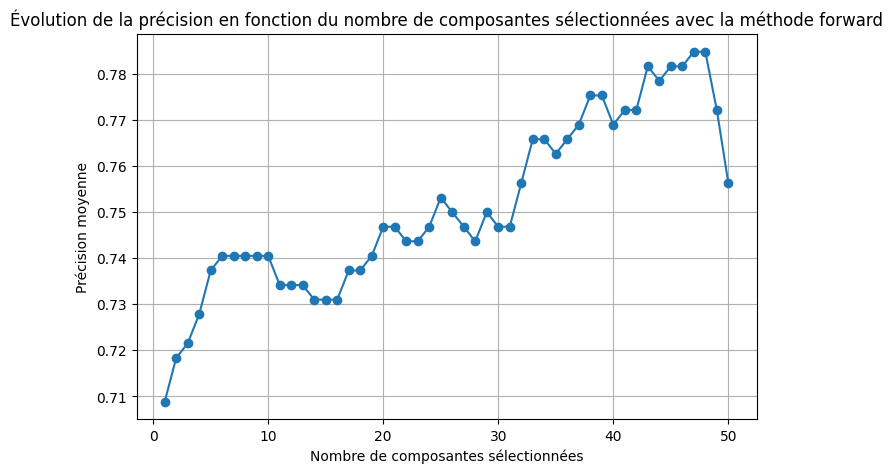

In [496]:
import matplotlib.pyplot as plt
import numpy as np

feature_range = np.arange(1, len(sfs.subsets_) + 1)
accuracy_scores = [sfs.subsets_[i]['avg_score'] for i in feature_range]

plt.figure(figsize=(8,5))
plt.plot(feature_range, accuracy_scores, marker='o', linestyle='-')
plt.xlabel("Nombre de composantes sélectionnées")
plt.ylabel("Précision moyenne")
plt.title("Évolution de la précision en fonction du nombre de composantes sélectionnées avec la méthode forward")
plt.grid()
plt.show()


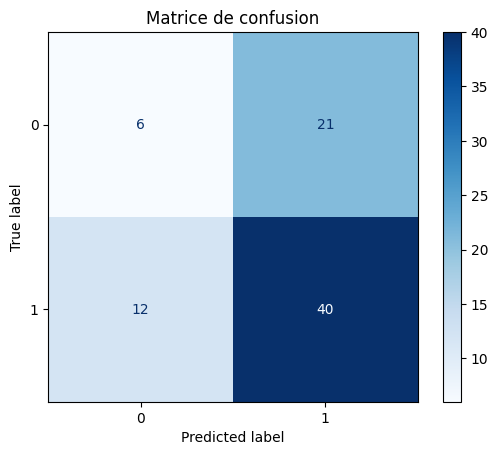

In [497]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lda.classes_)
disp.plot(cmap="Blues")
plt.title("Matrice de confusion")
plt.show()


## Stepwise

In [498]:
lda_stepwise = LinearDiscriminantAnalysis()

In [499]:
# Sélection Stepwise (combinaison de Forward et Backward)
sfs_stepwise = SequentialFeatureSelector(lda_stepwise,
                                         k_features="best",
                                         forward=True,  # Démarre en ajoutant des variables (forward)
                                         floating=True,  # Permet d'ajouter et de supprimer des variables à chaque étape (backward, supprime)
                                         scoring='accuracy',
                                         cv=None)

X_train, X_test, y_train, y_test = train_test_split(ca.row_topandas().iloc[:,:50], data_encoded['G3_>=10'], test_size=0.2, random_state=42)

sfs_stepwise = sfs_stepwise.fit(X_train, y_train)

# Variables sélectionnées au final
selected_features = list(sfs_stepwise.k_feature_names_)

print("Variables sélectionnées après Stepwise:", selected_features)
print(len(selected_features))


Variables sélectionnées après Stepwise: ['row_coord_dim1', 'row_coord_dim2', 'row_coord_dim3', 'row_coord_dim7', 'row_coord_dim9', 'row_coord_dim10', 'row_coord_dim11', 'row_coord_dim12', 'row_coord_dim14', 'row_coord_dim16', 'row_coord_dim17', 'row_coord_dim18', 'row_coord_dim19', 'row_coord_dim20', 'row_coord_dim21', 'row_coord_dim22', 'row_coord_dim24', 'row_coord_dim25', 'row_coord_dim26', 'row_coord_dim27', 'row_coord_dim28', 'row_coord_dim29', 'row_coord_dim30', 'row_coord_dim31', 'row_coord_dim32', 'row_coord_dim33', 'row_coord_dim34', 'row_coord_dim35', 'row_coord_dim36', 'row_coord_dim37', 'row_coord_dim38', 'row_coord_dim39', 'row_coord_dim40', 'row_coord_dim42', 'row_coord_dim43', 'row_coord_dim44', 'row_coord_dim45', 'row_coord_dim46', 'row_coord_dim47', 'row_coord_dim49', 'row_coord_dim50']
41


In [500]:
lda_stepwise.fit(X_train[selected_features], y_train)

LinearDiscriminantAnalysis()

In [501]:
y_pred=lda_stepwise.predict(X_test[selected_features])

In [503]:
accuracy = accuracy_score(y_test, y_pred)
AUC=roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("AUC:", AUC)

Accuracy: 0.5822784810126582
AUC: 0.469017094017094


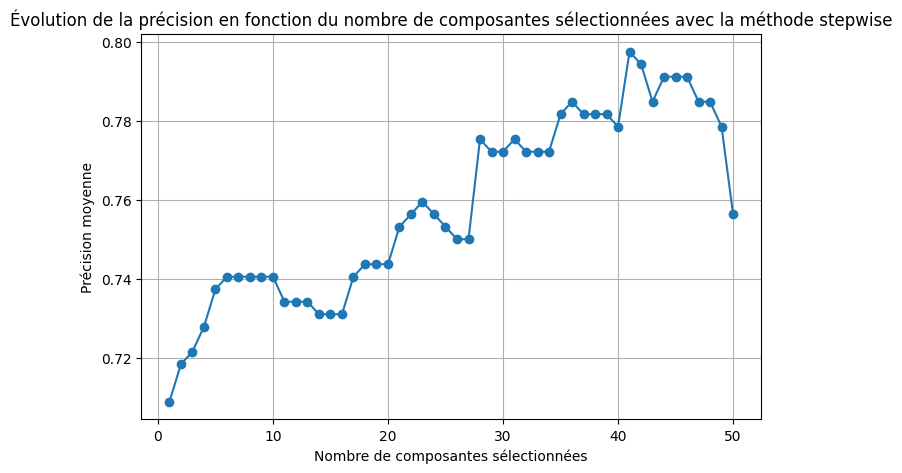

In [504]:
feature_range = np.arange(1, len(sfs_stepwise.subsets_) + 1)
accuracy_scores = [sfs_stepwise.subsets_[i]['avg_score'] for i in feature_range]

plt.figure(figsize=(8,5))
plt.plot(feature_range, accuracy_scores, marker='o', linestyle='-')
plt.xlabel("Nombre de composantes sélectionnées")
plt.ylabel("Précision moyenne")
plt.title("Évolution de la précision en fonction du nombre de composantes sélectionnées avec la méthode stepwise")
plt.grid()
plt.show()


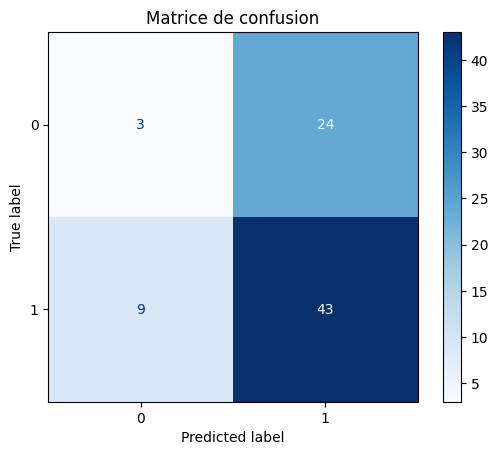

In [505]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lda.classes_)
disp.plot(cmap="Blues")
plt.title("Matrice de confusion")
plt.show()


##  Avec une analyse quadratique

In [512]:
qda=QuadraticDiscriminantAnalysis()

In [513]:
sfs_qda = SequentialFeatureSelector(qda,
                                k_features='best',
                                forward=True,
                                scoring='accuracy',
                                cv=None)


sfs_qda=sfs_qda.fit(X_train, y_train)

In [514]:
selected_features = sfs_qda.k_feature_names_
print(selected_features)
print(len(selected_features))

('row_coord_dim1', 'row_coord_dim2', 'row_coord_dim3', 'row_coord_dim4', 'row_coord_dim5', 'row_coord_dim6', 'row_coord_dim7', 'row_coord_dim8', 'row_coord_dim9', 'row_coord_dim10', 'row_coord_dim11', 'row_coord_dim12', 'row_coord_dim13', 'row_coord_dim14', 'row_coord_dim15', 'row_coord_dim16', 'row_coord_dim17', 'row_coord_dim18', 'row_coord_dim19', 'row_coord_dim20', 'row_coord_dim21', 'row_coord_dim22', 'row_coord_dim23', 'row_coord_dim24', 'row_coord_dim25', 'row_coord_dim26', 'row_coord_dim27', 'row_coord_dim29', 'row_coord_dim30', 'row_coord_dim31', 'row_coord_dim32', 'row_coord_dim33', 'row_coord_dim34', 'row_coord_dim35', 'row_coord_dim36', 'row_coord_dim37', 'row_coord_dim38', 'row_coord_dim39', 'row_coord_dim40', 'row_coord_dim41', 'row_coord_dim42', 'row_coord_dim44', 'row_coord_dim45', 'row_coord_dim46', 'row_coord_dim47', 'row_coord_dim48', 'row_coord_dim49', 'row_coord_dim50')
48


In [515]:
selected_features = list(selected_features)
qda.fit(X_train[selected_features], y_train)

QuadraticDiscriminantAnalysis()

In [516]:
y_pred=qda.predict(X_test[selected_features])

In [517]:
accuracy = accuracy_score(y_test, y_pred)
AUC=roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("AUC:", AUC)

Accuracy: 0.6075949367088608
AUC: 0.49715099715099714


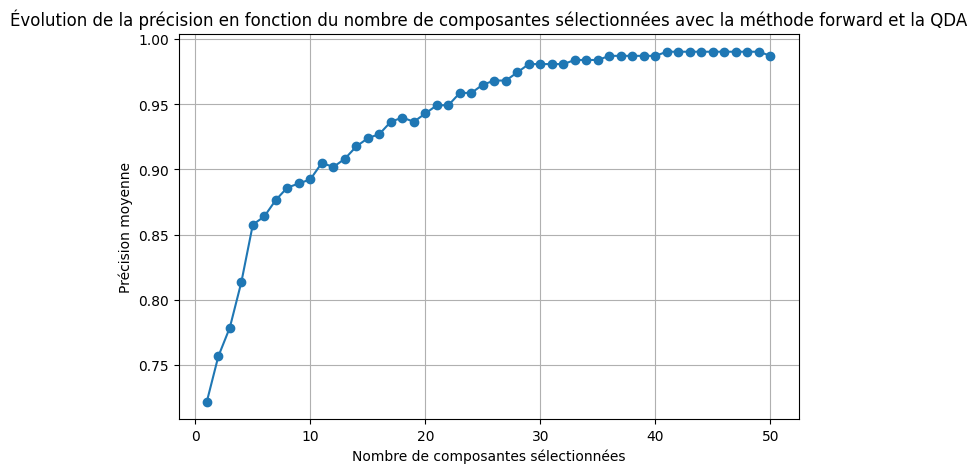

In [304]:
feature_range = np.arange(1, len(sfs_qda.subsets_) + 1)
accuracy_scores = [sfs_qda.subsets_[i]['avg_score'] for i in feature_range]

plt.figure(figsize=(8,5))
plt.plot(feature_range, accuracy_scores, marker='o', linestyle='-')
plt.xlabel("Nombre de composantes sélectionnées")
plt.ylabel("Précision moyenne")
plt.title("Évolution de la précision en fonction du nombre de composantes sélectionnées avec la méthode forward et la QDA")
plt.grid()
plt.show()


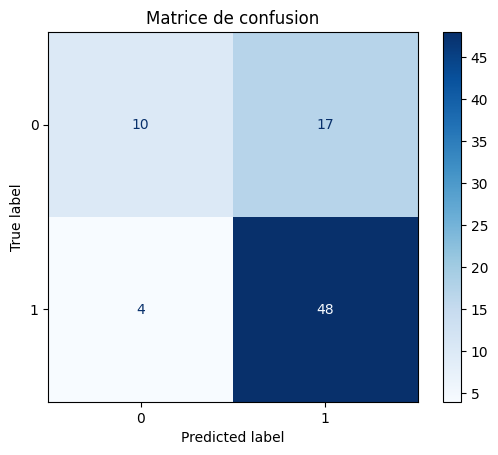

In [305]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lda.classes_)
disp.plot(cmap="Blues")
plt.title("Matrice de confusion")
plt.show()
